In [1]:
# Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data_src = "heart_2020_cleaned.csv"
data = pd.read_csv(data_src)

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

 **Columns**
 
 1) BMI:
     a person's weight in kilograms (or pounds) divided by the square of height in meters (or feet)
     A high BMI can indicate high body fatness. BMI screens for weight categories that may lead to health problems, but it does
     not diagnose the body fatness or health of an individual.
     
 2) Stroke:
     The sudden death of brain cells due to lack of oxygen, caused by blockage of blood flow or rupture of an artery to the 
     brain
 
 3) Diabetic: 
        مريض بالسكر
 
 4) Asthma: 
         مريض بالربو  
 
 5) Kidney Disease
         مريض كلوى
 
 6) GenHealth: General health

 
 
 
 
 
 
 

In [6]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
data['AgeCategory'].value_counts(normalize=True)*100

65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64

In [8]:
80-18

62

In [9]:
62/5

12.4

In [10]:
data['Race'].value_counts(normalize=True)*100

White                             76.677872
Hispanic                           8.582373
Black                              7.173033
Other                              3.417189
Asian                              2.522866
American Indian/Alaskan Native     1.626667
Name: Race, dtype: float64

In [11]:
data['Sex'].value_counts(normalize=True)*100

Female    52.472678
Male      47.527322
Name: Sex, dtype: float64

In [12]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**Question:**

1. most likely to have disease on the heart males or females?

2. is there any relation between skinCancer and heart disease
3. is there any relation between KidneyDisease and heart disease
4. is there any relation between Asthma and heart disease
5. is there any relation between stroke and heart disease
6. is there any relation between diabetic and heart disease

7. how many hours should i sleep to avoid getting any heart diseases
8. who is most likely to get heart disease according to Age category

9. does smoking affect the health of the heart?
10. does getting overweighted affect the health of the heart

11. being healthy is make our heart healthy too, does this true

12. does the heart affect on the walking ?
13. how far drinking alcohol affect the health of the heart

14. mental health meaning that we less likely to get stroke , does this true ?
15. doing excerises every day may affect on the heart and make it work well ,does this true?



In [13]:
list_xtickls = []
for item in sorted(list(data['SleepTime'].unique())):
    if(int(item) <= 10):
        list_xtickls.append(item)
    else:
        break

In [14]:
list_xtickls

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [15]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [16]:
data['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [17]:
data['Diabetic'] = data['Diabetic'].replace(['No, borderline diabetes','Yes (during pregnancy)'],['No','Yes'])

In [18]:
data['Diabetic'].value_counts()

No     276434
Yes     43361
Name: Diabetic, dtype: int64

## Analysis Based on Gender

In [19]:
data['Sex'].value_counts(normalize=True)*100

Female    52.472678
Male      47.527322
Name: Sex, dtype: float64

In [20]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [21]:
len(data.columns)

18

In [22]:
cat_cols = data.select_dtypes('O').columns

In [23]:
num_cols = data.select_dtypes('number').columns

In [24]:
num_cols

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [25]:
data.groupby('Sex')[cat_cols].describe().T

Sex                         Female       Male
HeartDisease     count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       156571     135851
Smoking          count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       105276      82611
AlcoholDrinking  count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       156547     141471
Stroke           count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       161378     146348
DiffWalking      count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       140699     134686
Sex              count      167805     151990
                 unique          1          1
                 top        Female       Male
                 freq       167805     151990
AgeCategory      count      167805     151990
                 unique         13         13
                 top         65-69      60-64
                 freq        18048      16114
Race             count      167805     151990
                 unique          6          6
                 top         White      White
                 freq       127500     117712
Diabetic         count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       144940     131494
PhysicalActivity count      167805     151990
                 unique          2          2
                 top           Yes        Yes
                 freq       126894     121063
GenHealth        count      167805     151990
                 unique          5          5
                 top     Very good  Very good
                 freq        59992      53866
Asthma           count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       141544     135379
KidneyDisease    count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       161351     146665
SkinCancer       count      167805     151990
                 unique          2          2
                 top            No         No
                 freq       152782     137194

In [26]:
data.groupby('Sex')[num_cols].describe().T

Sex                          Female           Male
BMI            count  167805.000000  151990.000000
               mean       28.162436      28.505317
               std         6.841990       5.767018
               min        12.020000      12.020000
               25%        23.300000      24.630000
               50%        26.750000      27.500000
               75%        31.620000      31.320000
               max        94.660000      94.850000
PhysicalHealth count  167805.000000  151990.000000
               mean        3.681225       3.029989
               std         8.184823       7.669794
               min         0.000000       0.000000
               25%         0.000000       0.000000
               50%         0.000000       0.000000
               75%         2.000000       1.000000
               max        30.000000      30.000000
MentalHealth   count  167805.000000  151990.000000
               mean        4.655916       3.061991
               std         8.488164       7.230357
               min         0.000000       0.000000
               25%         0.000000       0.000000
               50%         0.000000       0.000000
               75%         5.000000       2.000000
               max        30.000000      30.000000
SleepTime      count  167805.000000  151990.000000
               mean        7.118536       7.073380
               std         1.452643       1.417041
               min         1.000000       1.000000
               25%         6.000000       6.000000
               50%         7.000000       7.000000
               75%         8.000000       8.000000
               max        24.000000      24.000000

In [27]:
data['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [28]:
list_col_cat = list(cat_cols)
list_col_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [29]:
list_col_cat = [element for element in list_col_cat if element not in ['Sex','AgeCategory','Race']]

In [30]:
data['Diabetic'].value_counts()

No     276434
Yes     43361
Name: Diabetic, dtype: int64

In [31]:
sex_gp = data.groupby('Sex')['Race'].value_counts(normalize=True)*100

In [32]:
data_sex_gp = pd.DataFrame(sex_gp)
data_sex_gp.rename(columns={"Race":"Percentage"},inplace=True)

In [33]:
data_sex_gp.reset_index(inplace=True)

In [34]:
data_sex_gp

,Sex,Race,Percentage
0,Female,White,75.981049
1,Female,Hispanic,8.678526
2,Female,Black,8.088555
3,Female,Other,3.265695
4,Female,Asian,2.318167
5,Female,American Indian/Alaskan Native,1.668008
6,Male,White,77.447200
7,Male,Hispanic,8.476216
8,Male,Black,6.162248
9,Male,Other,3.584446


HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease


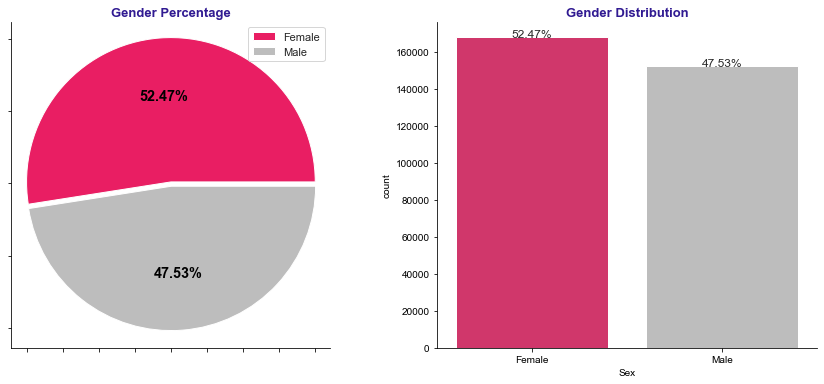

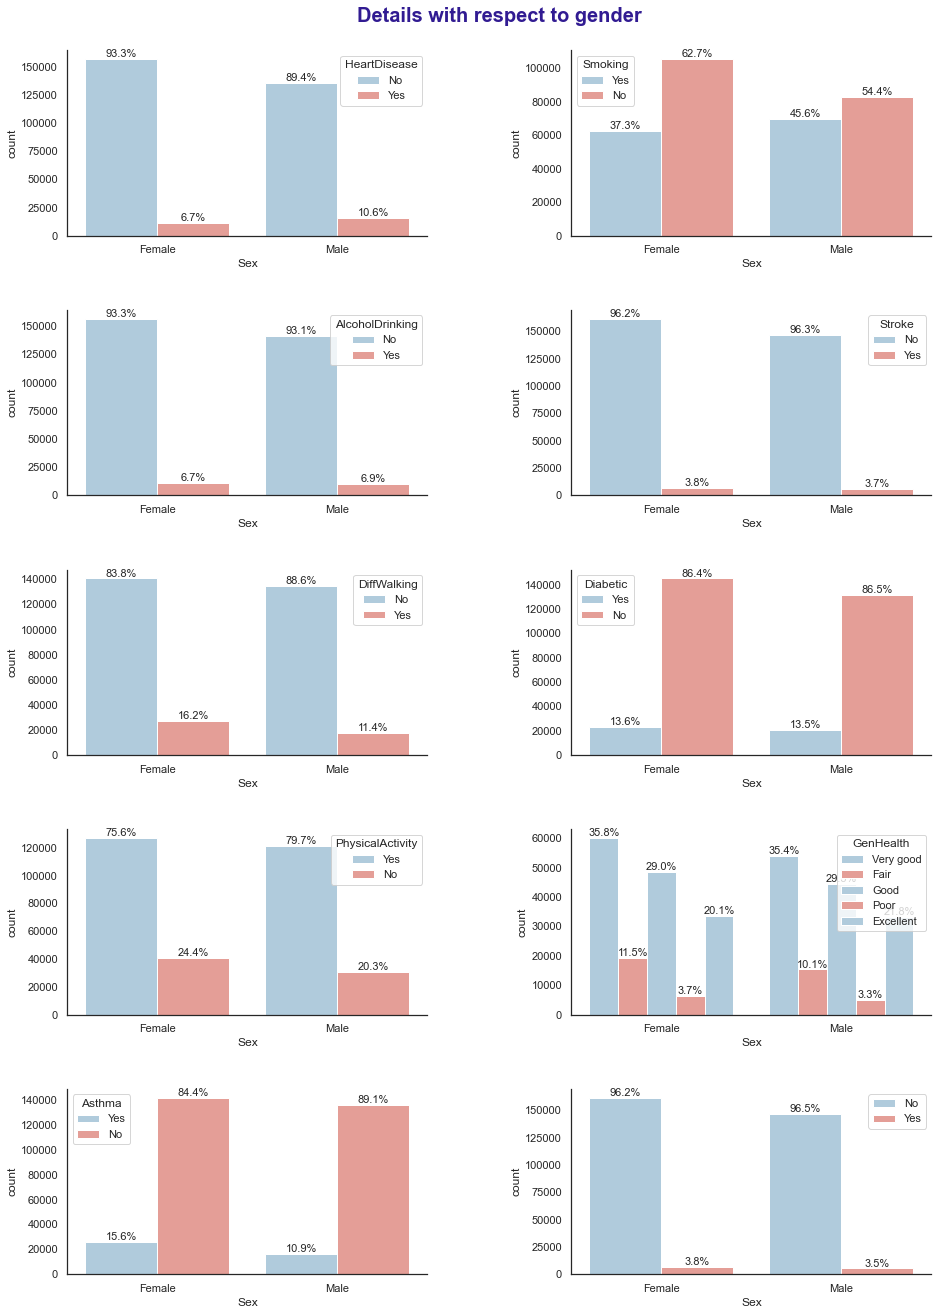

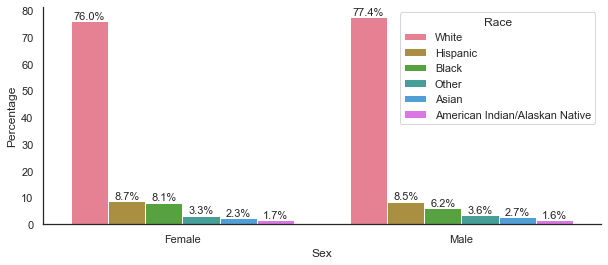

In [35]:
fig,ax = plt.subplots(1,2,figsize=(15, 6),squeeze=True)
sns.set(style='white')
ser = (data['Sex'].value_counts(normalize=True)*100)
ser.plot(kind='pie',autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold',
                 'color':'black',},colors= ['#E91E63', '#BDBDBD'],explode=[0.01,0.02],frame=True,ax=ax[0],labels=None)
ax[0].legend(ser.index)
ax[0].set_ylabel('')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])
ax[0].set_title('Gender Percentage',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
sns.despine()
fig.show()
ax = sns.countplot(data['Sex'],ax=ax[1],palette=['#E91E63', '#BDBDBD'])
ax.set_title('Gender Distribution',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
percentage = list(data['Sex'].value_counts(normalize=True).values*100)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center',)

sns.despine()

fig.show()


fig,axs = plt.subplots(5,2,figsize=(15,20),squeeze=False)
sns.set(style='white')
for axis,cat in zip(axs.ravel(),list_col_cat):
    ax = sns.countplot(data['Sex'],hue=data[cat],ax=axis,palette=['#A9CCE3','#F1948A'])
    percentage_above_bar_relative_to_xgroup(ax)
    ax.legend(title=str(cat),loc='best')
    print(cat)
    sns.despine()

plt.figure(figsize=(10,4))
# fig.title('Gender Visualization',fontsize=13,) 
ax = sns.barplot(x=data_sex_gp['Sex'],y=data_sex_gp['Percentage'],hue=data_sex_gp['Race'],palette='husl')
percentage_above_bar_relative_to_xgroup(ax)
axis.legend(loc='best')    
sns.despine()    
    
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.95,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Details with respect to gender',fontweight='bold',fontdict={'color':'#311B92'}, fontsize = 20)
       
fig.show()

In [36]:
data.groupby('Sex')[num_cols].describe().T

Sex                          Female           Male
BMI            count  167805.000000  151990.000000
               mean       28.162436      28.505317
               std         6.841990       5.767018
               min        12.020000      12.020000
               25%        23.300000      24.630000
               50%        26.750000      27.500000
               75%        31.620000      31.320000
               max        94.660000      94.850000
PhysicalHealth count  167805.000000  151990.000000
               mean        3.681225       3.029989
               std         8.184823       7.669794
               min         0.000000       0.000000
               25%         0.000000       0.000000
               50%         0.000000       0.000000
               75%         2.000000       1.000000
               max        30.000000      30.000000
MentalHealth   count  167805.000000  151990.000000
               mean        4.655916       3.061991
               std         8.488164       7.230357
               min         0.000000       0.000000
               25%         0.000000       0.000000
               50%         0.000000       0.000000
               75%         5.000000       2.000000
               max        30.000000      30.000000
SleepTime      count  167805.000000  151990.000000
               mean        7.118536       7.073380
               std         1.452643       1.417041
               min         1.000000       1.000000
               25%         6.000000       6.000000
               50%         7.000000       7.000000
               75%         8.000000       8.000000
               max        24.000000      24.000000

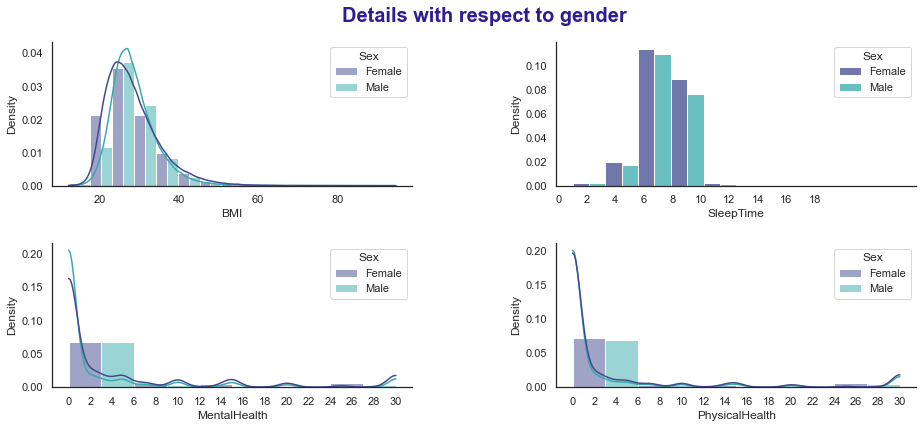

In [37]:
fig , ax = plt.subplots(2,2,figsize=(15,6))
sns.set_style('white')


axis = sns.histplot(x=data[num_cols[0]],hue=data['Sex'],stat='density',multiple='dodge',kde=True,bins=15,palette='mako',ax = ax[0,0])
sns.histplot(x=data[num_cols[-1]],hue=data['Sex'],stat='density',multiple='dodge',bins=10,palette='mako',ax=ax[0,1])
ax[0,1].set_xticks(list(range(0,20,2)))

sns.histplot(x=data[num_cols[-2]],hue=data['Sex'],stat='density',multiple='dodge',kde=True,bins=5,palette='mako',ax=ax[1,0])
ax[1,0].set_xticks(list(range(0,32,2)))

sns.histplot(x=data[num_cols[-3]],hue=data['Sex'],stat='density',multiple='dodge',kde=True,bins=5,palette='mako',ax=ax[1,1])
ax[1,1].set_xticks(list(range(0,32,2)))

fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.suptitle('Details with respect to gender',fontweight='bold',fontdict={'color':'#311B92'}, fontsize = 20)
sns.despine()

> **mean BMI for Male is slightly greater than Mean Bmi For Female Which give an indication that females care about their weights**

> **almost average of sleeping time for males and females is the same**

> **Distribution for Mental Health and Physical Health are almost the same** 

In [38]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [39]:
ser = (data.groupby('PhysicalActivity')['Sex'].value_counts(normalize=True)['Yes']*100)
ser.index.values

array(['Female', 'Male'], dtype=object)

In [40]:
data_sex_health = pd.DataFrame(ser)

In [41]:
data_sex_health

,Sex
Sex,
Female,51.175809
Male,48.824191


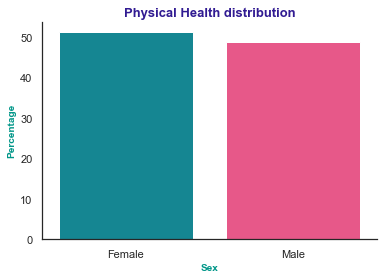

In [42]:
# ser = (data.groupby('PhysicalActivity')['Sex'].value_counts(normalize=True)['Yes']*100)
sns.set_style('white')
ax = sns.barplot(x=data_sex_health.index,y=data_sex_health['Sex'],palette=['#0097A7','#FF4081'])
ax.set_title('Physical Health distribution',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
ax.set_ylabel('Percentage',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax.set_xlabel('Sex',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})

sns.despine()

In [43]:
ser = data.groupby('AlcoholDrinking')['Sex'].value_counts(normalize=True)['Yes']*100

In [44]:
ser

Sex
Female    51.696744
Male      48.303256
Name: Sex, dtype: float64

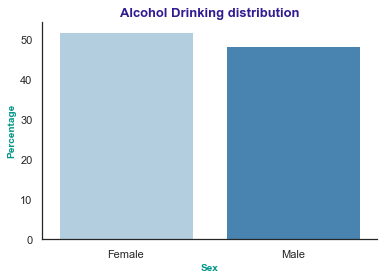

In [46]:
sns.set_style('white')
ax = sns.barplot(x=ser.index,y=ser.values,palette='Blues')
ax.set_title('Alcohol Drinking distribution',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
ax.set_ylabel('Percentage',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax.set_xlabel('Sex',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})

sns.despine()

In [47]:
ser = data.groupby('HeartDisease')['Sex'].value_counts(normalize=True)['Yes']*100
ser

Sex
Male      58.959559
Female    41.040441
Name: Sex, dtype: float64

In [48]:
pd.DataFrame(ser).rename(columns={"Sex":'Percentage'})

,Percentage
Sex,
Male,58.959559
Female,41.040441


In [49]:
data.groupby('Diabetic')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Female    52.731717
Male      47.268283
Name: Sex, dtype: float64

In [50]:
data.groupby('Asthma')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Female    61.254432
Male      38.745568
Name: Sex, dtype: float64

In [51]:
data.groupby('Asthma')[['HeartDisease','Sex']].value_counts(normalize=True)['Yes']['Yes']*100

Sex
Female    6.304814
Male      5.201530
dtype: float64

In [52]:
data.groupby('Asthma')[['HeartDisease','Sex']].value_counts(normalize=True)['Yes']['No']*100

Sex
Female    54.949617
Male      33.544038
dtype: float64

In [53]:
data.groupby('Asthma')[['HeartDisease','Sex']].value_counts(normalize=True)['No']['Yes']*100

Sex
Male      5.022696
Female    3.080640
dtype: float64

In [ ]:
data.groupby('HeartDisease')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Male      58.959559
Female    41.040441
Name: Sex, dtype: float64

In [ ]:
data.groupby('Stroke')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Female    53.252134
Male      46.747866
Name: Sex, dtype: float64

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
data.groupby('DiffWalking')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Female    61.035803
Male      38.964197
Name: Sex, dtype: float64

In [ ]:
data.groupby('KidneyDisease')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Female    54.792427
Male      45.207573
Name: Sex, dtype: float64

In [ ]:
data.groupby('SkinCancer')['Sex'].value_counts(normalize=True)['Yes']*100

Sex
Female    50.38063
Male      49.61937
Name: Sex, dtype: float64

In [ ]:
data[data['SleepTime'] < 7]['Sex'].value_counts(normalize=True)*100

Female    52.121956
Male      47.878044
Name: Sex, dtype: float64

In [ ]:
data[(data['BMI'] > 25)]['Sex'].value_counts(normalize=True)*100

Male      51.439584
Female    48.560416
Name: Sex, dtype: float64

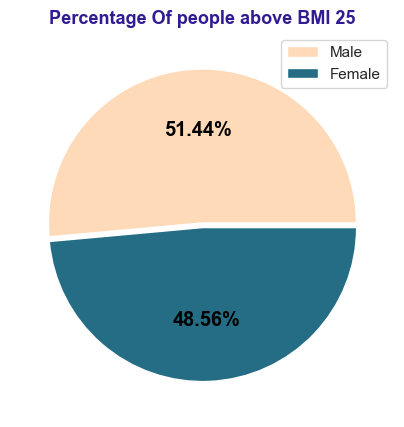

In [ ]:
sns.set_style('white')
plt.figure(figsize=(12,5))
ser = (data[(data['BMI'] > 25)]['Sex'].value_counts(normalize=True)*100)
ax1 =  ser.plot(kind='pie',autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold','rotation':None,
                 'color':'black'},colors=['peachpuff', '#256D85'],explode=[0.01,0.02],labels=None)
ax1.legend(ser.index)
ax1.set_title('Percentage Of people above BMI 25',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
ax1.set_ylabel('')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
sns.despine()
plt.show()

## Asthma Vs Heart Disease

In [ ]:
data['Asthma'].value_counts(normalize=True)*100

No     86.593912
Yes    13.406088
Name: Asthma, dtype: float64

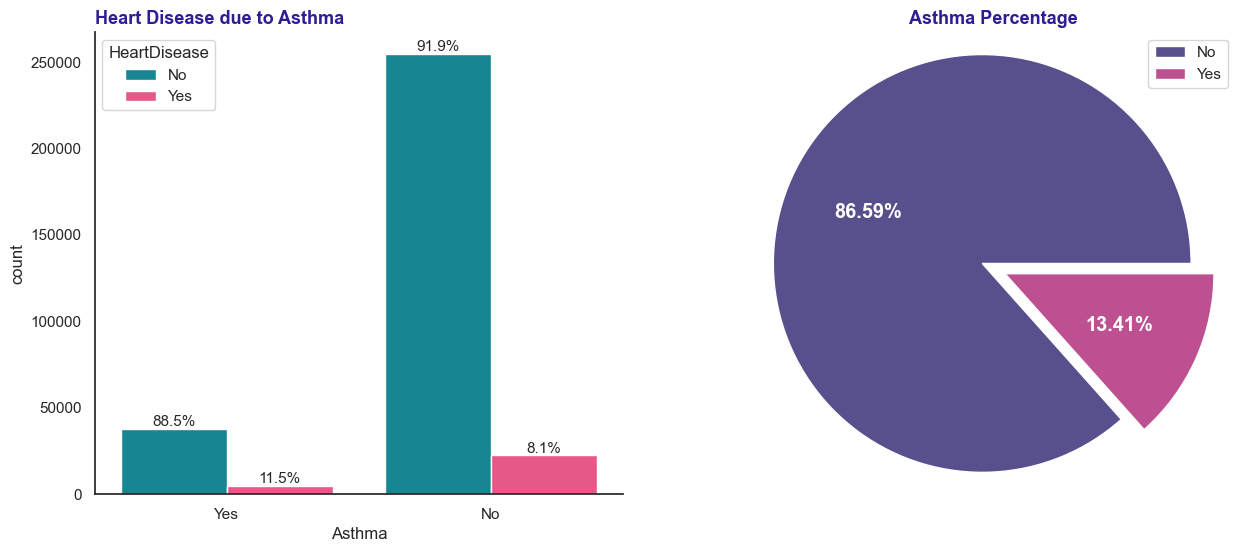

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
# fig.figure(figsize=(7,5))
# sns.set_style('white')
sns.countplot(ax=ax1,x=data['Asthma'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax1)
# ax.legend(loc='best')
ax1.legend(loc='upper left',title='HeartDisease')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_title('Heart Disease due to Asthma',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})


# -------------------------------------------------------------------------------------------------------------------

(data['Asthma'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold','rotation':None,
                 'color':'w'},colors=['#58508D','#BC5090'],explode=[0.1,0.02],frame=True,ax=ax2)
ax2.legend(['No','Yes'])
ax2.set_title('Asthma Percentage')
ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_title('Asthma Percentage',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
fig.show()

In [ ]:
ser = data.groupby('Asthma')['HeartDisease'].value_counts(normalize=True)['Yes']*100
ser

HeartDisease
No     88.493656
Yes    11.506344
Name: HeartDisease, dtype: float64

> **there is a huge percentage of people that have Asthma and heart problems**

In [ ]:
col = 'AgeCategory'
t = pd.DataFrame((data[data['Asthma']== 'Yes'][col].value_counts() / data[col].value_counts() * 100)).sort_values(col)

In [ ]:
t

,AgeCategory
80 or older,9.294912
75-79,11.190764
70-74,11.817158
65-69,12.064068
55-59,13.250664
60-64,13.352728
50-54,13.678985
35-39,14.009732
45-49,14.386673
40-44,14.591069


In [61]:
data['AgeCategory'] = data['AgeCategory'].replace('80 or older','80<=')

In [62]:
ser=data['AgeCategory'].value_counts() 

In [63]:
age_dist = pd.DataFrame(ser)

In [ ]:
age_dist

,AgeCategory
65-69,34151
60-64,33686
70-74,31065
55-59,29757
50-54,25382
80<=,24153
45-49,21791
75-79,21482
18-24,21064
40-44,21006


In [64]:
total = age_dist['AgeCategory'].sum()
total

319795

In [65]:
age_dist['percentage'] = age_dist['AgeCategory'].apply(lambda x: round((x/total)*100),2)

In [ ]:
age_dist

,AgeCategory,percentage
65-69,34151,11
60-64,33686,11
70-74,31065,10
55-59,29757,9
50-54,25382,8
80<=,24153,8
45-49,21791,7
75-79,21482,7
18-24,21064,7
40-44,21006,7


In [66]:
def set_per_given_axis_total(ax,total):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

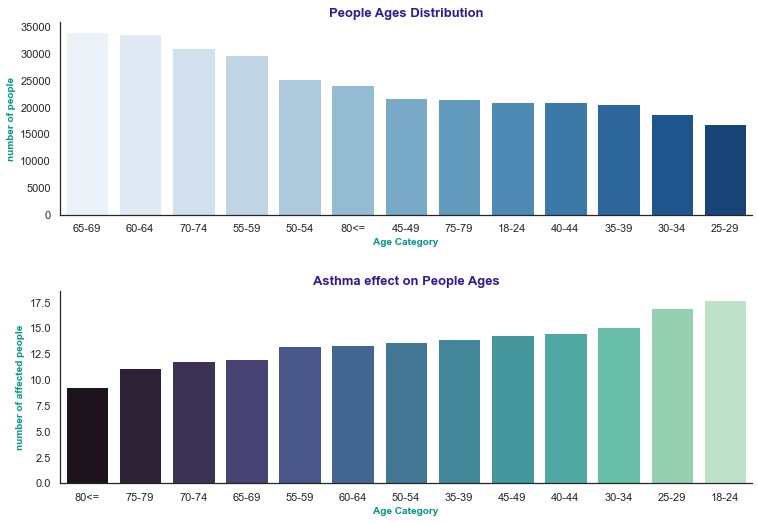

In [67]:
sns.set()
sns.set_style('white')
fig,ax = plt.subplots(2,1,figsize=(12,8))
# plt.figure()
# age_dist = pd.DataFrame((data['AgeCategory'].value_counts())).sort_values('AgeCategory')
ax1 = sns.barplot(x=age_dist.index,y=age_dist['AgeCategory'],palette= 'Blues',ax=ax[0])
ax[0].set_title('People Ages Distribution',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax[0].set_xlabel('Age Category',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax[0].set_ylabel('number of people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
# -------------------------------------------------------------------------------------------------------------------

col = 'AgeCategory'
t = pd.DataFrame((data[data['Asthma']== 'Yes'][col].value_counts() / data[col].value_counts() * 100)).sort_values(col)
ax2 = sns.barplot(y=t[col], x=t[col].index,palette='mako',ax=ax[1])
total2= t['AgeCategory'].sum()
ax[1].set_title('Asthma effect on People Ages',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax[1].set_xlabel('Age Category',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax[1].set_ylabel('number of affected people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.despine()
plt.show()

> **most affected people by asthma are from [18-24] years old and less affected by it are 80 or older**

## Effect Of Athma on Walking

### Q. does Asthma attack effect on walking normally?

In [ ]:
def plot_histogram_and_pie(column1,column2,column_pie,title1,title2):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
    # plt.figure(figsize=(7, 5))
    sns.set_style('white')
    ax1 = sns.countplot(ax=ax1,x=data[column1],hue=data[column2],palette=['#5B2C6F','#A6ACAF'])
    percentage_above_bar_relative_to_xgroup(ax1)
    # ax.legend(loc='best')
    ax1.legend(loc='upper left',title='HeartDisease')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title(title2,fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})

    # -------------------------------------------------------------------------------------------------------------------------
    ser = (data[column_pie].value_counts(normalize=True)*100)
    ser.plot(kind='pie',autopct='%.2f%%',
           textprops={'size':'large','fontweight':'bold','rotation':None,
                     'color':'w'},colors=['#D4AC0D','#BC5090'],explode=[0.1,0.02],frame=True,ax=ax2)
    ax2.legend(ser.index)
    ax2.set_ylabel('')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    ax2.set_title(title2,fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
    fig.show()
    
    return ax1,ax2

In [ ]:
data['DiffWalking'].value_counts()

No     275385
Yes     44410
Name: DiffWalking, dtype: int64

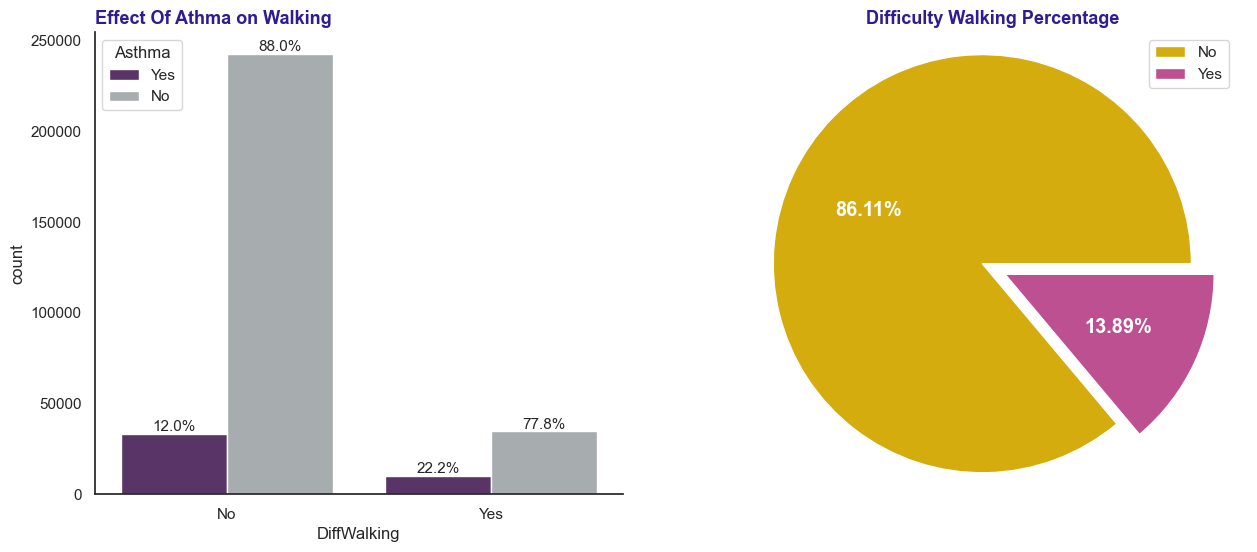

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))
# plt.figure(figsize=(7, 5))
sns.set_style('white')
ax1 = sns.countplot(ax=ax1,x=data['DiffWalking'],hue=data['Asthma'],palette=['#5B2C6F','#A6ACAF'])
percentage_above_bar_relative_to_xgroup(ax1)
# ax.legend(loc='best')
ax1.legend(loc='upper left',title='Asthma')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Effect Of Athma on Walking',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})

# -------------------------------------------------------------------------------------------------------------------------
ser = (data['DiffWalking'].value_counts(normalize=True)*100)
ser.plot(kind='pie',autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold','rotation':None,
                 'color':'w'},colors=['#D4AC0D','#BC5090'],explode=[0.1,0.02],frame=True,ax=ax2)
ax2.legend(ser.index)
# ax2.set_title('Asthma Percentage')
ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_title('Difficulty Walking Percentage',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
fig.show()

> **it's now clear that Asthma is affect on the amount of oxygen which also affect on the ability of heart to do its jobs And therefore that person who effected by Asthma ,has some difficulties on walking normally**

## Smoking effectiveness to Asthma Attack

### Q. is smoking considered to be the reason to get Asthma attack?

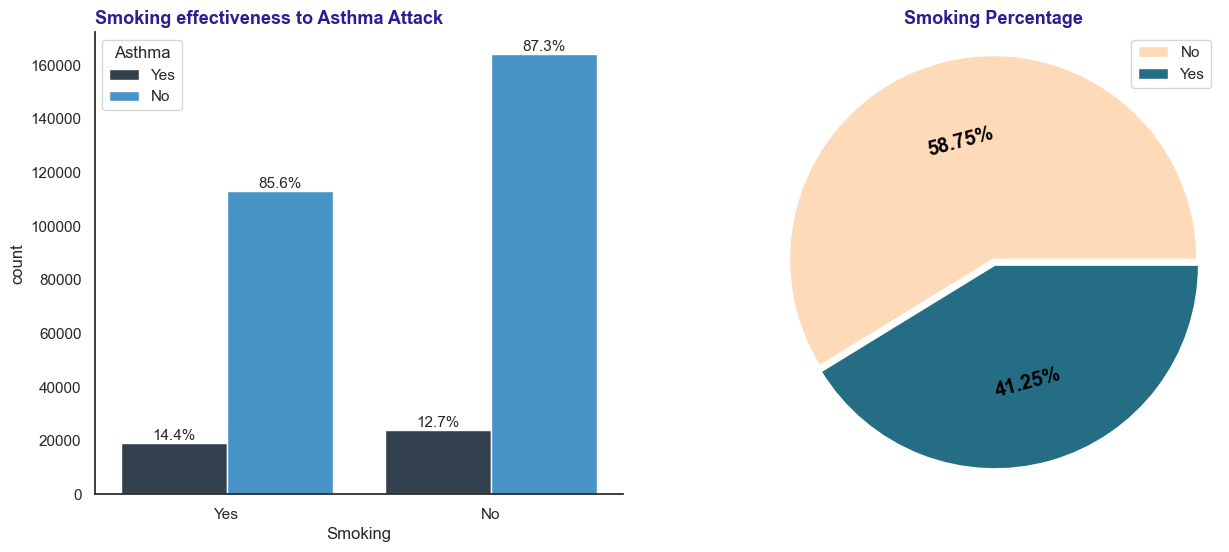

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 6))

sns.set_style('white')
ax1 = sns.countplot(ax=ax1,x=data['Smoking'],hue=data['Asthma'],palette=['#2E4053','#3498DB'])
percentage_above_bar_relative_to_xgroup(ax1)
# ax.legend(loc='best')
ax1.legend(loc='upper left',title='Asthma')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Smoking effectiveness to Asthma Attack',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})

# -------------------------------------------------------------------------------------------------------------------------


ser = (data['Smoking'].value_counts(normalize=True)*100)
ser.plot(kind='pie',autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold','rotation':'15',
                 'color':'black',},colors= ['peachpuff', '#256D85'],explode=[0.01,0.02],frame=True,ax=ax2,labels=None)
ax2.legend(ser.index)

ax2.set_ylabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_title('Smoking Percentage',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
fig.show()

> **it's not clear that Smoking is the reason to trigger the Asthma attack** 

### Q. is being overweight effect on probability to have Asthma attack ?

In [ ]:
ser = data.groupby('Asthma')['BMI'].value_counts(normalize=True)['Yes'] *100

In [ ]:
asthma_vs_bmi = pd.DataFrame(ser)

In [ ]:
asthma_vs_bmi.rename(columns={'BMI':'PercentageOfAsthmEffect'},inplace=True)

In [ ]:
asthma_vs_bmi

,PercentageOfAsthmEffect
BMI,
26.63,1.019313
27.46,0.905020
27.44,0.828046
24.41,0.650774
32.28,0.613454
...,...
83.93,0.002333
84.44,0.002333
85.91,0.002333


In [ ]:
filter_bmi = asthma_vs_bmi[asthma_vs_bmi['PercentageOfAsthmEffect'] > 0.5]

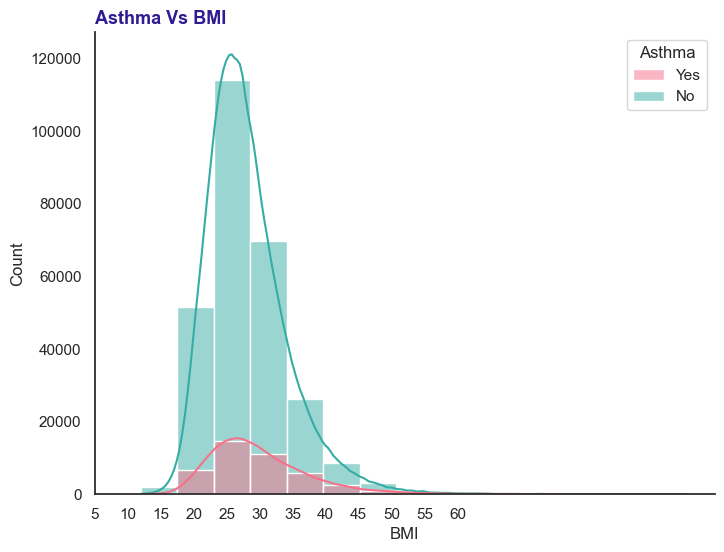

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['BMI'],hue = data['Asthma'],bins=15,palette= 'husl',stat='count',multiple='layer',kde=True)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('Asthma Vs BMI',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()


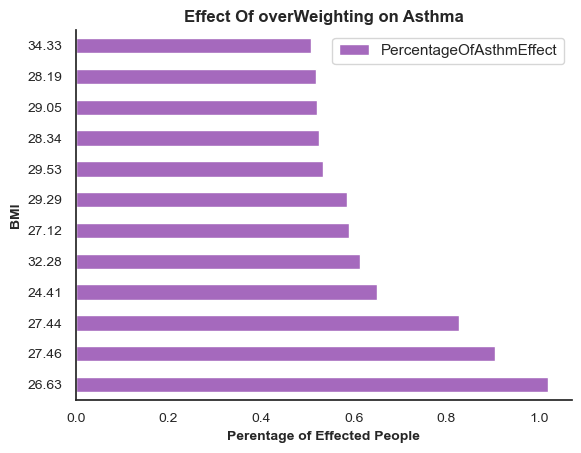

In [ ]:
sns.set()
sns.set_style('white')
# plt.barh(y=)
asthma_vs_bmi[asthma_vs_bmi['PercentageOfAsthmEffect'] > 0.5].plot(kind='barh',color='#A569BD')
plt.legend(labels=None)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.title('Effect Of overWeighting on Asthma',fontsize=12,fontweight='bold')
plt.ylabel('BMI',fontsize=10,fontweight='bold')
plt.xlabel('Perentage of Effected People',fontsize=10,fontweight='bold')
sns.despine()
plt.show()

> **so BMI has no effect on Asthma attack** 

### Does Asthma depends on Race?

In [ ]:
race_dist = data['Race'].value_counts(normalize=True)*100

In [ ]:
race_dist_data =pd.DataFrame(race_dist) 

In [ ]:
race_dist_data

,Race
White,76.677872
Hispanic,8.582373
Black,7.173033
Other,3.417189
Asian,2.522866
American Indian/Alaskan Native,1.626667


In [ ]:
data.groupby('Asthma')['Race'].value_counts(normalize=True)*100

Asthma  Race                          
No      White                             77.100855
        Hispanic                           8.539558
        Black                              6.956807
        Other                              3.216779
        Asian                              2.627806
        American Indian/Alaskan Native     1.558195
Yes     White                             73.945699
        Hispanic                           8.858929
        Black                              8.569696
        Other                              4.711700
        American Indian/Alaskan Native     2.068949
        Asian                              1.845027
Name: Race, dtype: float64

In [ ]:
ser = data.groupby('AgeCategory')[['Race','Asthma']].value_counts(normalize=True)['18-24']

In [ ]:
ser

Race                            Asthma
White                           No        0.519227
Hispanic                        No        0.139147
White                           Yes       0.109903
Black                           No        0.057539
Asian                           No        0.047997
Other                           No        0.044578
Hispanic                        Yes       0.028912
Black                           Yes       0.016284
American Indian/Alaskan Native  No        0.014575
Other                           Yes       0.012343
Asian                           Yes       0.006504
American Indian/Alaskan Native  Yes       0.002991
dtype: float64

In [ ]:
data_Race_age_Asthma = pd.DataFrame(ser)

In [ ]:
data_Race_age_Asthma.reset_index(inplace=True)

In [ ]:
data_Race_age_Asthma.columns

Index(['Race', 'Asthma', 0], dtype='object')

In [ ]:
data_Race_age_Asthma.rename(columns={0:'Count'},inplace=True)

In [ ]:
# what 

In [ ]:
data_Race_age_Asthma[data_Race_age_Asthma['Asthma']=='Yes'].rename(columns={0:'Count'})

,Race,Asthma,Count
2,White,Yes,0.109903
6,Hispanic,Yes,0.028912
7,Black,Yes,0.016284
9,Other,Yes,0.012343
10,Asian,Yes,0.006504
11,American Indian/Alaskan Native,Yes,0.002991


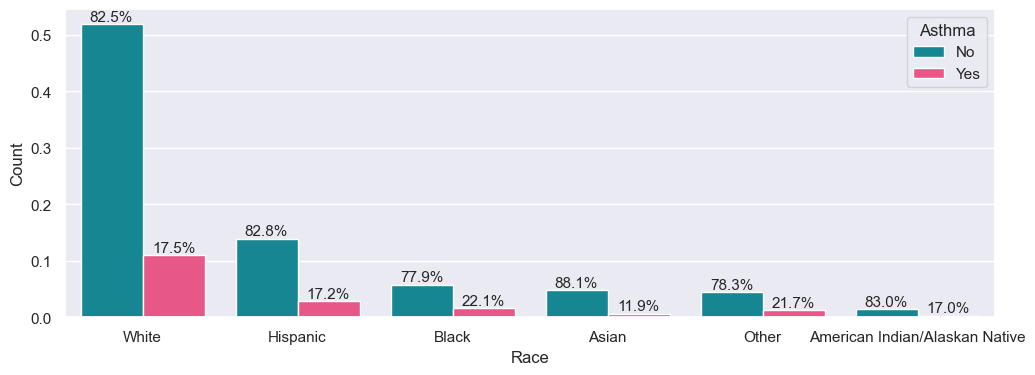

In [ ]:
sns.set()
plt.figure(figsize=(12,4))

ax = sns.barplot(x=data_Race_age_Asthma['Race'],y=data_Race_age_Asthma['Count'],hue=data_Race_age_Asthma['Asthma'],
            palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)

In [ ]:
data_Race_age_Asthma.drop(data_Race_age_Asthma.index[data_Race_age_Asthma['Race']=='Other'],inplace=True)

In [ ]:
ser = data.groupby('Asthma')['AgeCategory'].value_counts(normalize=True)['Yes']*100

In [ ]:
ser.sort_values(inplace=True)

In [ ]:
ser2 = data[(data['AgeCategory']=='60-64') & (data['Asthma']=='Yes')]['Race'].value_counts(normalize=True)*100

In [ ]:
ser2

White                             77.478880
Black                              8.025789
Hispanic                           6.002668
Other                              4.579813
American Indian/Alaskan Native     2.312139
Asian                              1.600711
Name: Race, dtype: float64

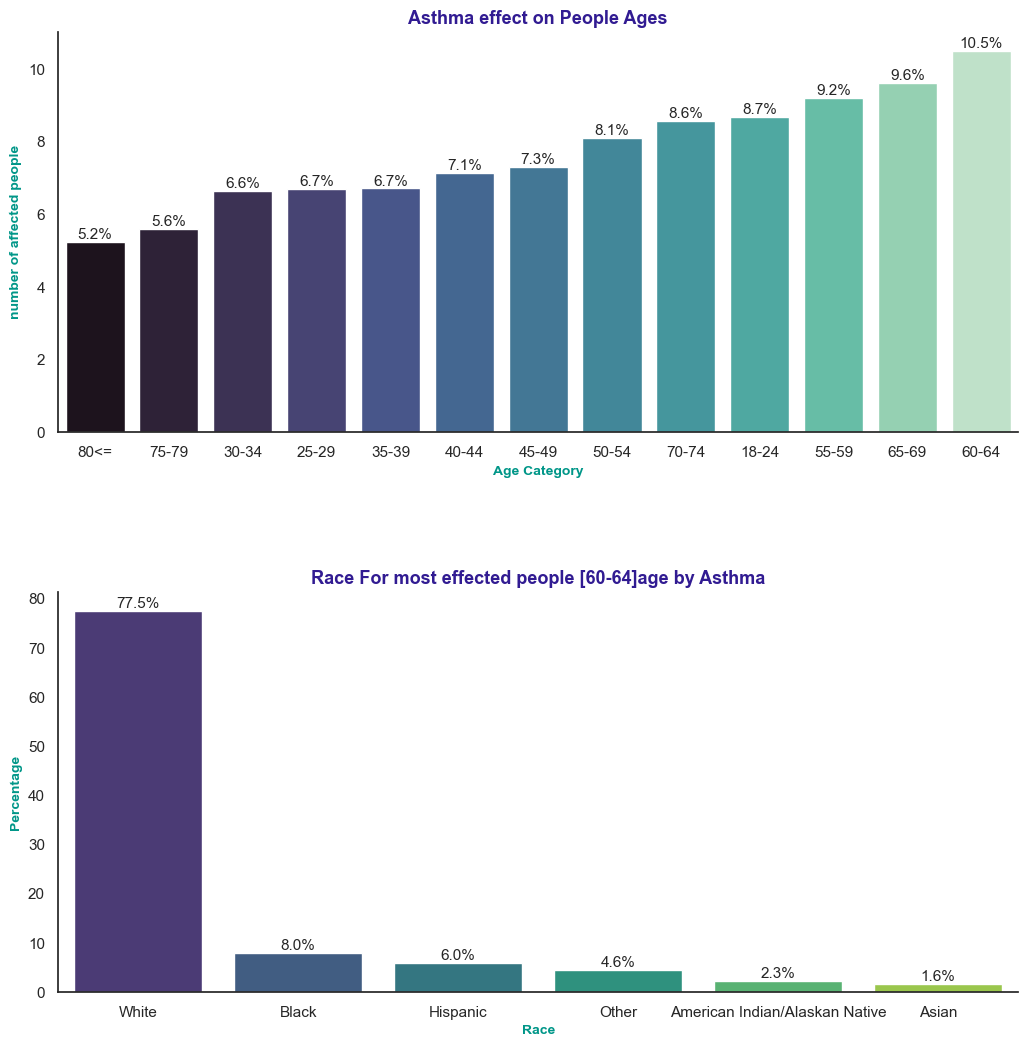

In [ ]:
sns.set()
sns.set_style('white')
fig,ax = plt.subplots(2,1,figsize=(12,12))

ax2 = sns.barplot(x=ser.index, y=ser.values,palette='mako',ax=ax[0])
total2= t['AgeCategory'].sum()
ax[0].set_title('Asthma effect on People Ages',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax[0].set_xlabel('Age Category',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax[0].set_ylabel('number of affected people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
set_per(ax2,100)
# -------------------------------------------------------------------------------------------------------------------

# # plt.figure()
# # age_dist = pd.DataFrame((data['AgeCategory'].value_counts())).sort_values('AgeCategory')
# ax12 = sns.barplot(x=race_dist_data.index,y=race_dist_data['Race'],palette= 'mako',ax=ax[1])
# ax[1].set_title('Race Distribution',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
# ax[1].set_xlabel('Race',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
# ax[1].set_ylabel('number of people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
# set_per(ax12,100)

# # -------------------------------------------------------------------------------------------------------------------

# col = 'Race'
# t = pd.DataFrame((data[data['Asthma']== 'Yes'][col].value_counts())).sort_values(col)
# ax2 = sns.barplot(y=t[col], x=t[col].index,palette='viridis',ax=ax[2])
# total2= t['Race'].sum()
# ax[2].set_title('Race effect on Asthma attack',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
# ax[2].set_xlabel('Age Category',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
# ax[2].set_ylabel('number of affected people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
# set_per(ax2,total2)

# -------------------------------------------------------------------------------------------------------------------


ax = sns.barplot(x=ser2.index,y=ser2.values,
            palette='viridis',ax=ax[1])
ax.set_title('Race For most effected people [60-64]age by Asthma',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax.set_xlabel('Race',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax.set_ylabel('Percentage',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
set_per(ax,100)



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.despine()
plt.show()

In [ ]:
data.groupby('Asthma')['Race'].value_counts(normalize=True)['Yes']*100

Race
White                             73.945699
Hispanic                           8.858929
Black                              8.569696
Other                              4.711700
American Indian/Alaskan Native     2.068949
Asian                              1.845027
Name: Race, dtype: float64

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

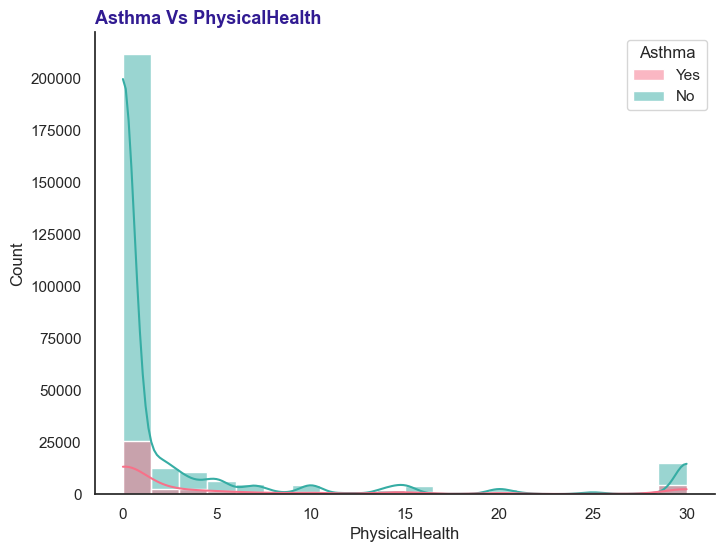

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['PhysicalHealth'],hue = data['Asthma'],bins=20,palette= 'husl',stat='count',multiple='layer',kde=True)
# plt.xticks()
plt.title('Asthma Vs PhysicalHealth',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()


In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
data.groupby('Asthma')['PhysicalActivity'].value_counts(normalize=True)['Yes']*100

PhysicalActivity
Yes    73.131648
No     26.868352
Name: PhysicalActivity, dtype: float64

In [ ]:
data.groupby('Asthma')['Stroke'].value_counts(normalize=True)['Yes']*100

Stroke
No     94.343628
Yes     5.656372
Name: Stroke, dtype: float64

In [ ]:
data.groupby('Asthma')['GenHealth'].value_counts(normalize=True)['Yes']*100

GenHealth
Good         32.116533
Very good    30.192200
Fair         17.542918
Excellent    12.686602
Poor          7.461747
Name: GenHealth, dtype: float64

In [ ]:
data.groupby('Asthma')['MentalHealth'].value_counts(normalize=True)['Yes']*100

MentalHealth
0.0     50.809386
30.0     9.428065
2.0      5.733346
5.0      5.495428
15.0     4.916962
10.0     4.548423
3.0      3.774025
1.0      3.006624
20.0     2.810692
7.0      2.318530
4.0      2.173913
25.0     1.110282
14.0     1.054301
6.0      0.667102
8.0      0.475835
12.0     0.347546
28.0     0.307893
21.0     0.184269
29.0     0.174939
18.0     0.109629
9.0      0.083971
17.0     0.081638
16.0     0.079306
27.0     0.055981
22.0     0.048983
13.0     0.046650
24.0     0.041985
11.0     0.039653
23.0     0.037320
26.0     0.027990
19.0     0.009330
Name: MentalHealth, dtype: float64

## Sleep time Vs Heart Disease

**ref**
1. https://www.cdc.gov/bloodpressure/sleep.htm

**What health conditions are linked to a lack of sleep?**

    A. Adults who sleep (less than 7 hours) each night are more likely to say they have had health problems,
       including heart attack, asthma, and depression.
       Some of these health problems raise the risk for heart disease, heart attack, and stroke
    

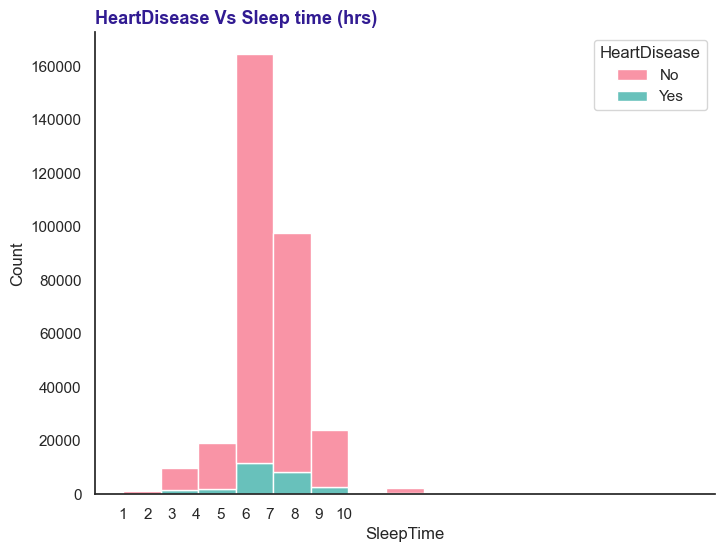

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['SleepTime'],hue = data['HeartDisease'],bins=15,palette= 'husl',stat='count',multiple='stack')
plt.xticks(list_xtickls)
plt.title('HeartDisease Vs Sleep time (hrs)',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()


 > **most people that have heart disease are sleeping between [5.5-8.5] hrs**

## BMI

**References:**
1. https://www.youtube.com/watch?v=TMDldXoDLrQ&t=65s
2. https://www.nhs.uk/conditions/type-2-diabetes/

**Illustration**
1. For most adults, an ideal BMI is in the 18.5 to 24.9 range.

2. For children and young people aged 2 to 18, the BMI calculation takes into account age and gender as well as height and weight.

3. If your BMI is:

    A. below 18.5 – you're in the underweight range.
    
    B. between 18.5 and 24.9 – you're in the healthy weight range.
    
    C. between 25 and 29.9 – you're in the overweight range.
    
    D. between 30 and 39.9 – you're in the obese range.
    
**4. Effect of it on the heart:**

    A. being overweight means the heart should work harder to move the blood   around the body leading to high blood pressure. 

    B. this will lead to have high cholesterol which can lead to fatty material building up in the arteries(شرايين) over time
    
    C. if the arteries that carry blood to the heart get damaged due to this fatty materials, it can lead to heart attack and if this arteries where working to carry the blood to the brain ,it can lead to ***stroke***
    
    
**5. Effect of being overweighted on the diabetes**
    
    A. that could develop type two of diabetes:
- Type 2 diabetes is a common condition that causes the level of sugar (glucose) in the blood to become too high.
- It's caused by problems with a chemical in the body (hormone) called insulin.

    A. our body releases this hormone when we eat to obsorb the glucose and use it as fuel for energy on healthy body this system works well but with the overweighted can causes alot of damaage
    
    B. People who are overweight, fat around the middle of body release chemicals that makes the body less sensitive to the insulin (In other words, this hormone couldn't reach the eat to absorb the glucose) which leads to rise on the glucose on the body causes type two of diabetes

    
    

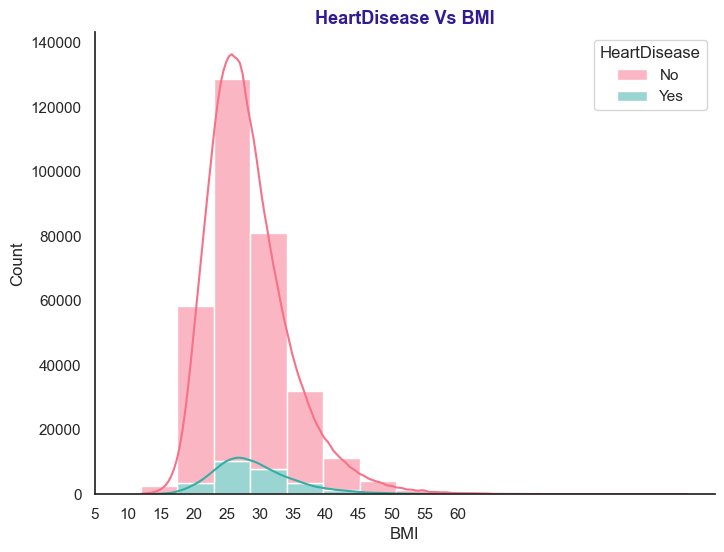

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['BMI'],hue = data['HeartDisease'],bins=15,palette= 'husl',stat='count',kde=True,multiple='stack')
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('HeartDisease Vs BMI',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()


> 

## Physical Health


1. Physical health is defined as the condition of your body, taking into consideration everything from the absence of disease to fitness level.
<br>
2. Physical health is critical for overall well-being, and can be affected by:

    A. Lifestyle: diet, **level of physical activity**, and behaviour (for instance, **smoking**)<br>
    B. Human biology: a person’s genetics and physiology may make it easier or harder to achieve good physical health<br>
    C. Environment: our surroundings and exposure to factors such as sunlight or toxic substances<br>
    D. Healthcare service: good healthcare can help prevent illness, as well as detect and treat illness<br>

In [ ]:
data['PhysicalHealth'].unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [ ]:
data['PhysicalHealth'].unique().max()

30.0

In [ ]:
ser = data['PhysicalHealth'].value_counts(normalize=True)*100

In [ ]:
ser

0.0     70.854454
30.0     6.100471
2.0      4.652981
1.0      3.279914
3.0      2.694539
5.0      2.378399
10.0     1.705155
15.0     1.567254
7.0      1.447490
4.0      1.397145
20.0     1.005644
14.0     0.904642
6.0      0.397129
25.0     0.363983
8.0      0.288935
21.0     0.195750
12.0     0.189184
28.0     0.139464
29.0     0.063791
9.0      0.056286
18.0     0.052221
16.0     0.042215
27.0     0.038775
17.0     0.034397
13.0     0.028456
22.0     0.027830
11.0     0.026580
24.0     0.020951
26.0     0.020638
23.0     0.014384
19.0     0.010945
Name: PhysicalHealth, dtype: float64

In [ ]:
ser[ser >=1]

0.0     70.854454
30.0     6.100471
2.0      4.652981
1.0      3.279914
3.0      2.694539
5.0      2.378399
10.0     1.705155
15.0     1.567254
7.0      1.447490
4.0      1.397145
20.0     1.005644
Name: PhysicalHealth, dtype: float64

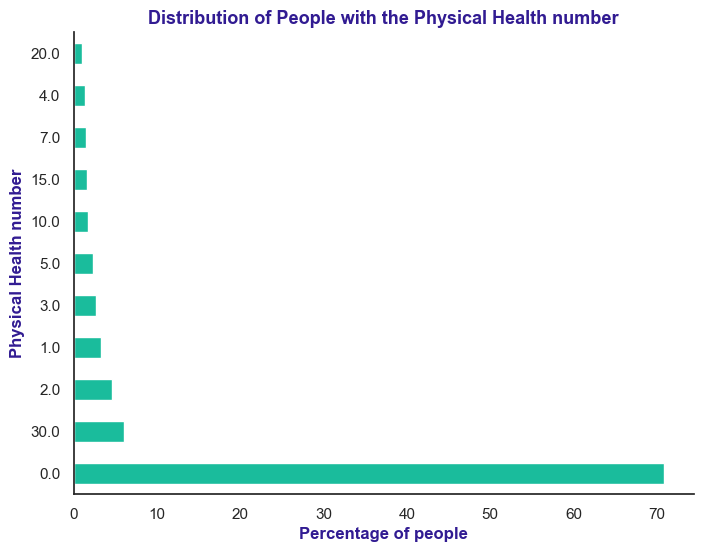

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8,6))
ax = ser[ser >= 1].plot.barh(color='#1ABC9C')
plt.ylabel('Physical Health number',fontsize=12,fontweight='bold',color='#311B92')
plt.xlabel('Percentage of people',fontsize=12,fontweight='bold',color='#311B92')
# plt.xticks(['10%','20%','30%','40%','50%','60%','70%'])
plt.title('Distribution of People with the Physical Health number',
          loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()

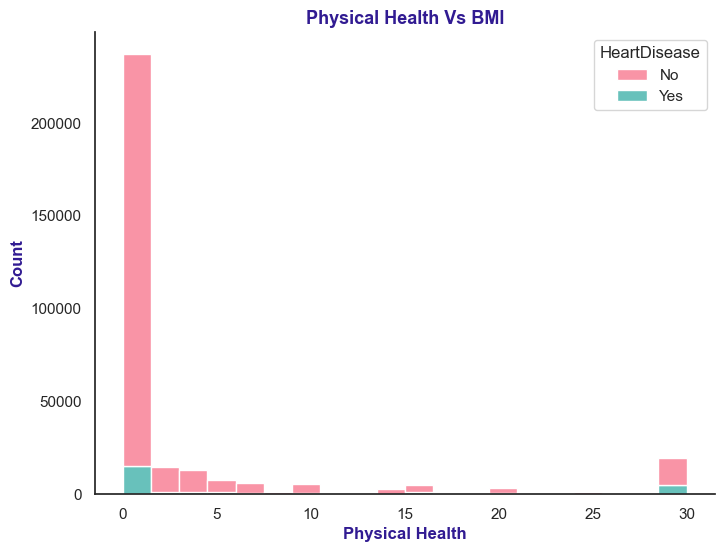

In [ ]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['PhysicalHealth'],hue = data['HeartDisease'],bins=20,palette= 'husl',stat='count',multiple='stack',)
plt.xticks()

plt.ylabel('Count',fontsize=12,fontweight='bold',color='#311B92')
plt.xlabel('Physical Health',fontsize=12,fontweight='bold',color='#311B92')
plt.title('Physical Health Vs BMI',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()


## Smoking Vs HeartDisease

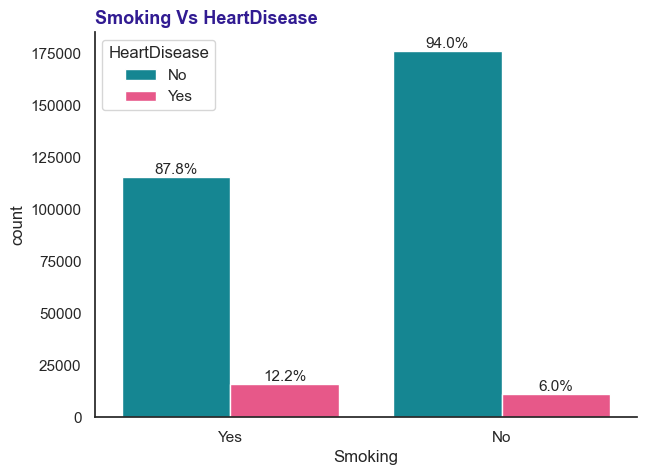

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data['Smoking'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper left',title='HeartDisease')
plt.title('Smoking Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

In [ ]:
data['Smoking'].value_counts(normalize=True)*100

No     58.752326
Yes    41.247674
Name: Smoking, dtype: float64

In [ ]:
data.groupby('Smoking')['HeartDisease'].value_counts(normalize=True)*100

Smoking  HeartDisease
No       No              93.966586
         Yes              6.033414
Yes      No              87.842284
         Yes             12.157716
Name: HeartDisease, dtype: float64


> **about half the percentage difference between the people who smoking and were injured by heart disease and those who are not smoking and survived**  

## AlcoholDrinking Vs HeartDisease

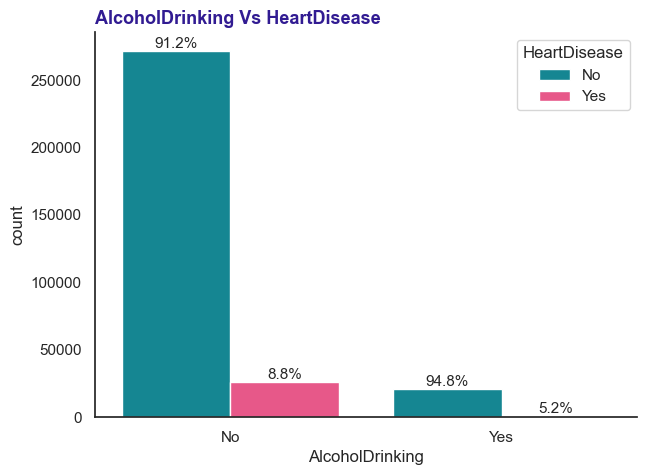

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data['AlcoholDrinking'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='HeartDisease')

plt.title('AlcoholDrinking Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

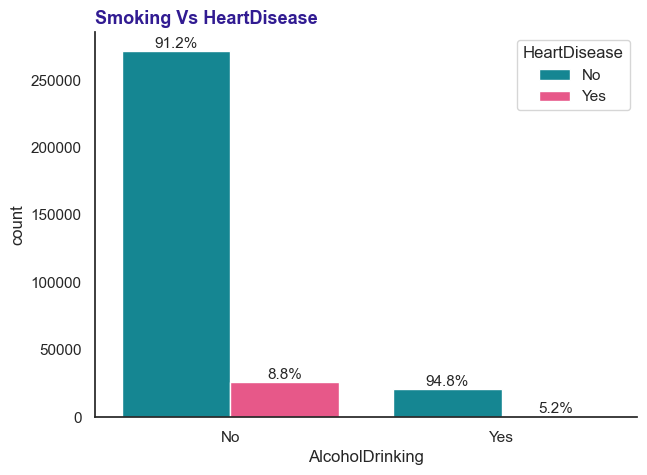

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data['AlcoholDrinking'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
plt.title('Smoking Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

In [ ]:
data['AlcoholDrinking'].value_counts(normalize=True)*100

No     93.190325
Yes     6.809675
Name: AlcoholDrinking, dtype: float64

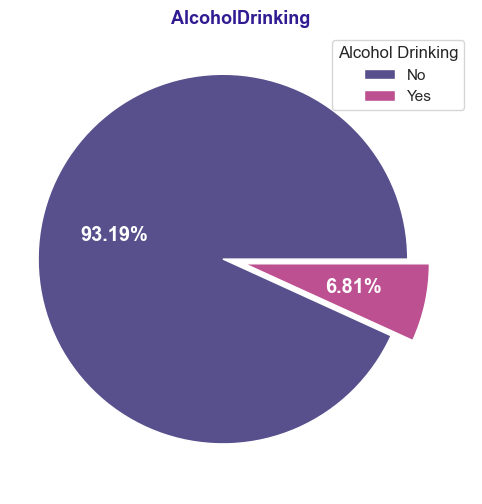

In [ ]:
# sns.set()
plt.figure(figsize=(9,6))
ser = data['AlcoholDrinking'].value_counts(normalize=True)*100
plt.pie((data['AlcoholDrinking'].value_counts(normalize=True)*100),autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold','rotation':None,
                 'color':'w'},colors=['#58508D','#BC5090'],explode=[0.1,0.02])
plt.legend(title='Alcohol Drinking',labels=ser.index)
plt.title('AlcoholDrinking',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
sns.despine()

In [ ]:
data.groupby('AlcoholDrinking')['HeartDisease'].value_counts()

AlcoholDrinking  HeartDisease
No               No              271786
                 Yes              26232
Yes              No               20636
                 Yes               1141
Name: HeartDisease, dtype: int64

In [ ]:
data.groupby('AlcoholDrinking')['HeartDisease'].describe()

,count,unique,top,freq
AlcoholDrinking,,,,
No,298018,2,No,271786
Yes,21777,2,No,20636


## Stroke Vs HeartDisease

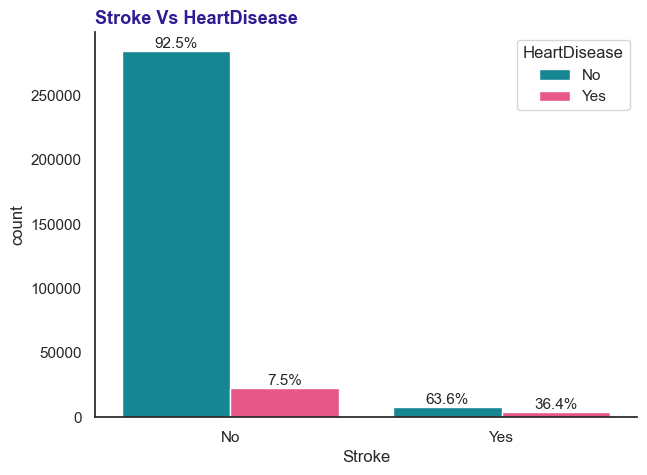

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['Stroke'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='HeartDisease')

plt.title('Stroke Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

In [ ]:
data['Stroke'].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [ ]:
data.groupby('Stroke')['HeartDisease'].value_counts()

Stroke  HeartDisease
No      No              284742
        Yes              22984
Yes     No                7680
        Yes               4389
Name: HeartDisease, dtype: int64

> **Comment:**
<br>
> معظم النسبه من الناس اللى عندهم تلف في بعض خلايا العقل مصابون بمرض القلب ودا منطقي جدا لان القلب طلما مش شغال كويس ممكن ياثر على عدم وصل الدم لبعض الخلايا دى
<br>
> Most of the people who have damage to some cells of the mind suffer from heart disease and this is very logical because the heart, as long as the heart is not working well, may affect the lack of blood supply to some of these cells.

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

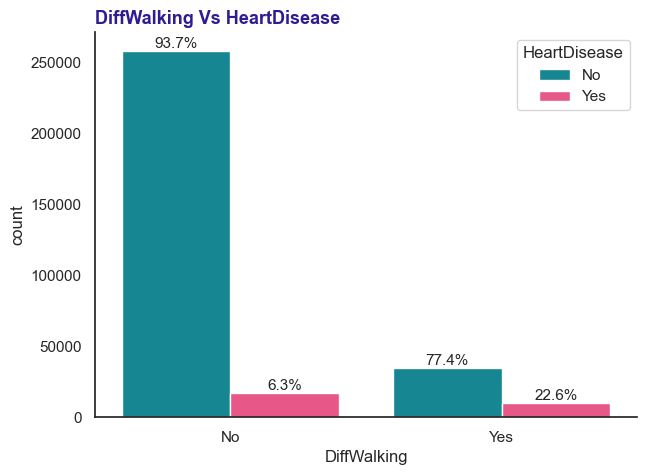

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['DiffWalking'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='HeartDisease')

plt.title('DiffWalking Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

## kidney
1. Kidney disease means that the kidneys are damaged and can’t filter blood as they should
2. This damage can cause wastes to build up in the body.
3. (Diabetes): Too much glucose in your blood for a long time can damage many parts of your body, including your heart and kidneys.

4. High Blood Pressure -> Damage Vessel in Kidneys -> Kidneys will not filter Blood -> Kidney Disease

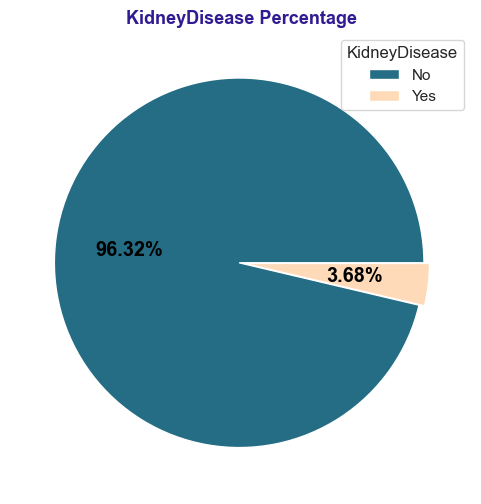

In [ ]:
plt.figure(figsize=(7,6))
plt.pie((data['KidneyDisease'].value_counts(normalize=True)*100),autopct='%.2f%%',
       textprops={'size':'large','fontweight':'bold','rotation':None,
                 'color':'black'},colors=['#256D85', 'peachpuff'],explode=[0.01,0.02])
plt.legend(title='KidneyDisease',labels=data['KidneyDisease'].value_counts().index,loc='best')
plt.title('KidneyDisease Percentage',fontsize=13,fontweight='bold',loc='center',fontdict={'color':'#311B92'})
sns.despine()

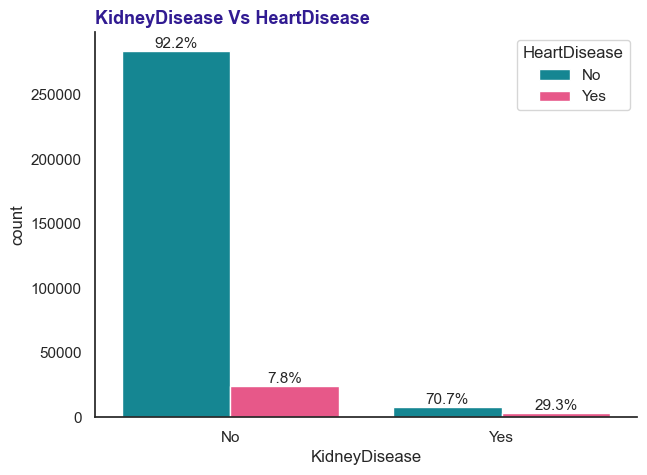

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['KidneyDisease'],hue=data['HeartDisease'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='HeartDisease')

plt.title('KidneyDisease Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

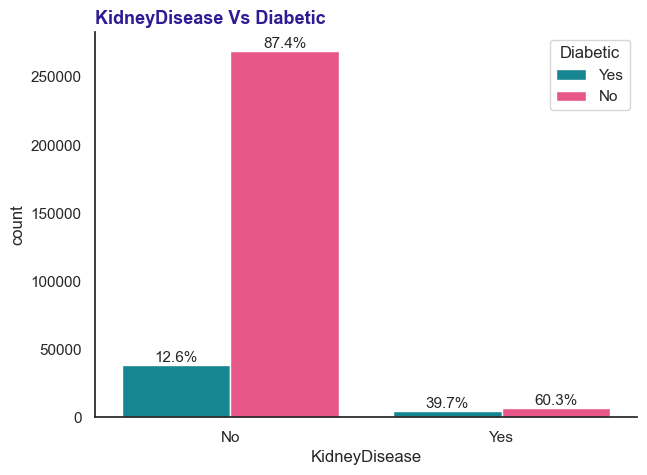

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['KidneyDisease'],hue=data['Diabetic'],palette=['#0097A7','#FF4081'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='Diabetic')

plt.title('KidneyDisease Vs Diabetic',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
ser = data.groupby('AgeCategory')[['KidneyDisease','Race']].value_counts()

In [ ]:
data_kidney_age = pd.DataFrame(ser)

In [ ]:
data_kidney_age

0
AgeCategory KidneyDisease Race                                 
18-24       No            White                           13173
                          Hispanic                         3510
                          Black                            1549
                          Other                            1188
                          Asian                            1144
...                                                         ...
80<=        Yes           Black                             106
                          Hispanic                           57
                          Other                              37
                          American Indian/Alaskan Native     18
                          Asian                              16

[156 rows x 1 columns]

In [ ]:
# data_kidney_age.rename(columns={'KidneyDisease':'Percentage'},inplace=True)
data_kidney_age.reset_index(inplace=True)

In [ ]:
data_kidney_age

,AgeCategory,KidneyDisease,Race,0
0,18-24,No,White,13173
1,18-24,No,Hispanic,3510
2,18-24,No,Black,1549
3,18-24,No,Other,1188
4,18-24,No,Asian,1144
...,...,...,...,...
151,80<=,Yes,Black,106
152,80<=,Yes,Hispanic,57
153,80<=,Yes,Other,37
154,80<=,Yes,American Indian/Alaskan Native,18


In [ ]:
t= data_kidney_age[(data_kidney_age['KidneyDisease']=='Yes')]

In [ ]:
t = pd.DataFrame(data.groupby('AgeCategory')['KidneyDisease'].value_counts())
t.rename(columns={'KidneyDisease':'Count'},inplace=True)
t.reset_index(inplace=True)
t

,AgeCategory,KidneyDisease,Count
0,18-24,No,20932
1,18-24,Yes,132
2,25-29,No,16840
3,25-29,Yes,115
4,30-34,No,18589
5,30-34,Yes,164
6,35-39,No,20294
7,35-39,Yes,256
8,40-44,No,20640
9,40-44,Yes,366


In [ ]:
data_temp = t[t['KidneyDisease']=='Yes']

In [ ]:
data_temp.sort_values(by='Count',inplace=True)

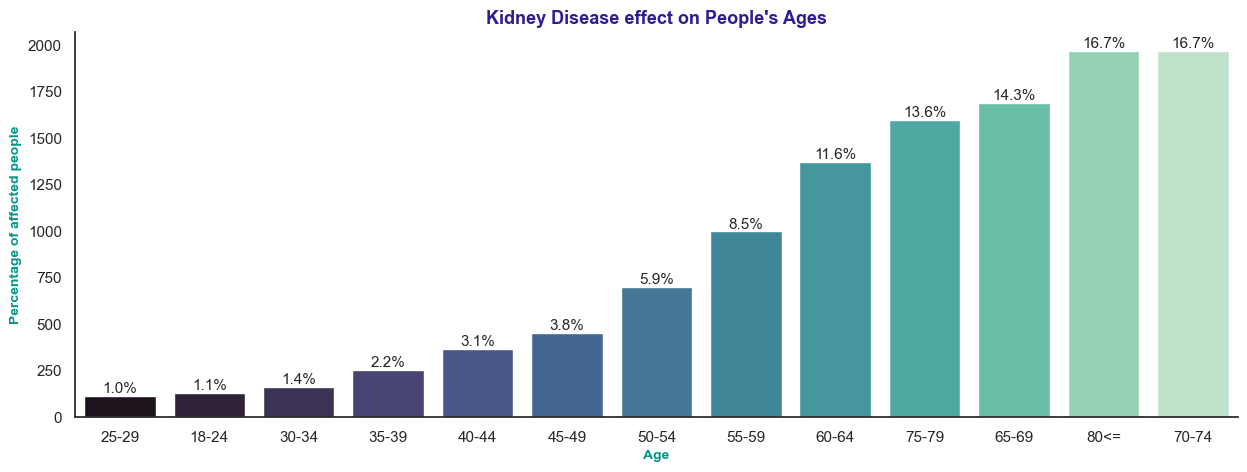

In [ ]:
plt.figure(figsize=(15,5))
# t= data_kidney_age[(data_kidney_age['KidneyDisease']=='Yes')]
ax2 = sns.barplot(x=data_temp['AgeCategory'], y=data_temp['Count'],palette='mako')
# total2= t['AgeCategory'].sum()
ax2.set_title('Kidney Disease effect on People\'s Ages',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax2.set_xlabel('Age',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax2.set_ylabel('Percentage of affected people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
set_per(ax2,data_temp['Count'].sum())
sns.despine()

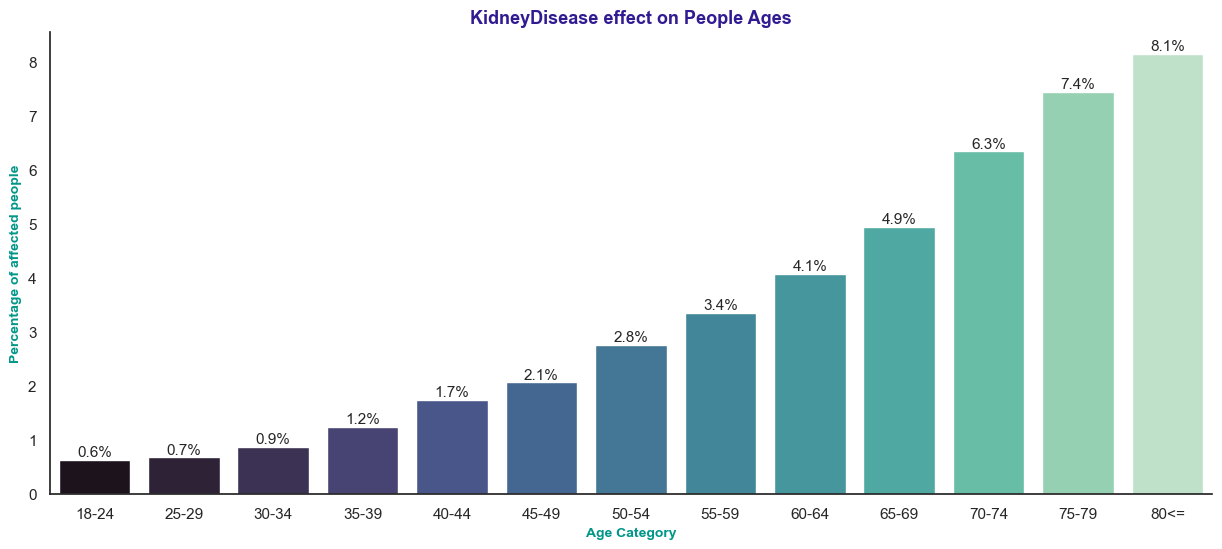

In [ ]:
# fig,ax = plt.subplot()
plt.figure(figsize=(15,6))
col = 'AgeCategory'
t = pd.DataFrame((data[data['KidneyDisease']== 'Yes'][col].value_counts() / data[col].value_counts() * 100)).sort_values(col)
ax2 = sns.barplot(y=t[col], x=t[col].index,palette='mako')
total2= t['AgeCategory'].sum()
ax2.set_title('KidneyDisease effect on People Ages',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax2.set_xlabel('Age Category',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax2.set_ylabel('Percentage of affected people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
set_per(ax2,100)
sns.despine()

In [ ]:
data_kidney_age[(data_kidney_age['AgeCategory']=='80<=') & (data_kidney_age['KidneyDisease']=='Yes')]

,AgeCategory,KidneyDisease,Race,0
145,80<=,Yes,White,1733
151,80<=,Yes,Black,106
152,80<=,Yes,Hispanic,57
153,80<=,Yes,Other,37
154,80<=,Yes,American Indian/Alaskan Native,18
155,80<=,Yes,Asian,16


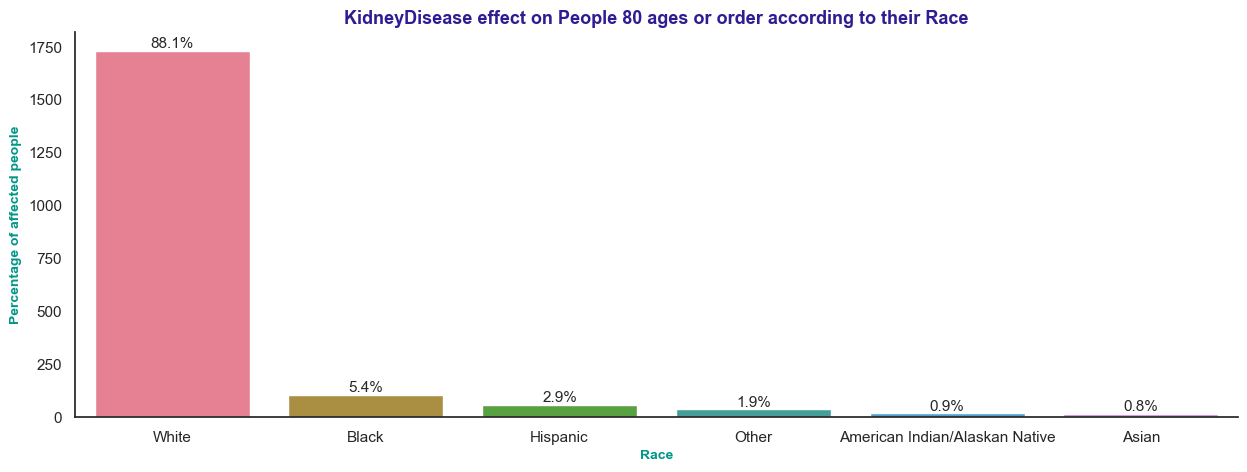

In [ ]:
plt.figure(figsize=(15,5))
t= data_kidney_age[(data_kidney_age['AgeCategory']=='80<=') & (data_kidney_age['KidneyDisease']=='Yes')]
ax2 = sns.barplot(x=t['Race'], y=t[0],palette='husl')
total2= t['AgeCategory'].sum()
ax2.set_title('KidneyDisease effect on People 80 ages or order according to their Race',loc='center',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
ax2.set_xlabel('Race',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
ax2.set_ylabel('Percentage of affected people',fontsize=10,fontweight='bold',fontdict={'color':'#009688'})
set_per(ax2,t[0].sum())
sns.despine()

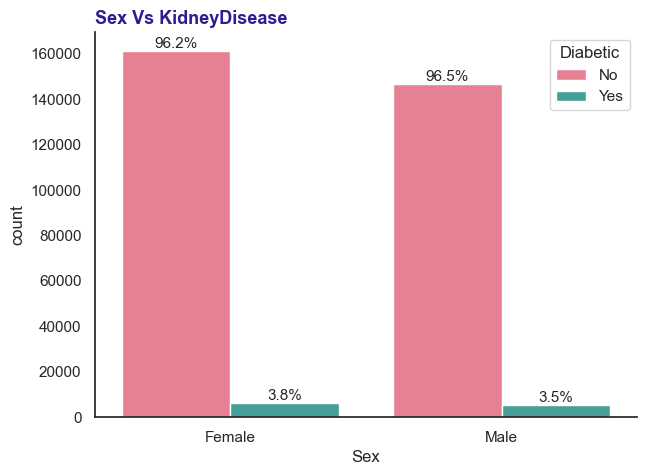

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['Sex'],hue=data['KidneyDisease'],palette='husl')
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='Diabetic')

plt.title('Sex Vs KidneyDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

**Comment**:
    most affected people in range 80 years old or order and about 7.2% of white people and 0.4% of black people  

## Skin Cancer

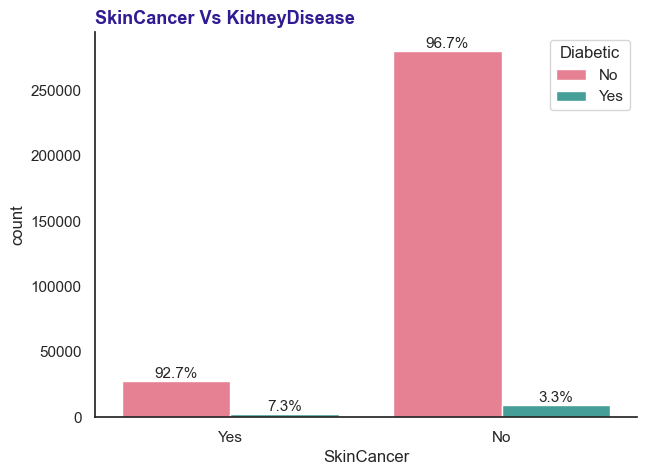

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['SkinCancer'],hue=data['KidneyDisease'],palette='husl')
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='Diabetic')

plt.title('SkinCancer Vs KidneyDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

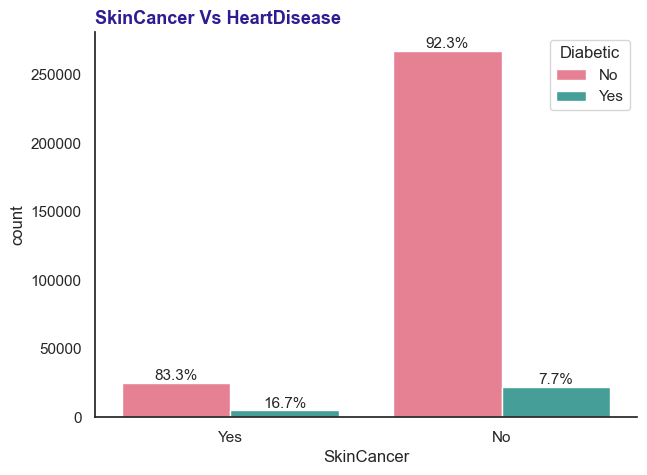

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('white')
ax = sns.countplot(data['SkinCancer'],hue=data['HeartDisease'],palette='husl')
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper right',title='Diabetic')

plt.title('SkinCancer Vs HeartDisease',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

## Emergency cases

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
filter_1 = (data['Diabetic']=='Yes') & (data['Asthma']=='Yes') & (data['SkinCancer']=='Yes') & (data['HeartDisease']=='Yes')

In [ ]:
data[filter_1]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
165,Yes,28.89,Yes,No,No,3.0,30.0,Yes,Female,75-79,White,Yes,No,Fair,8.0,Yes,No,Yes
1148,Yes,36.61,No,No,Yes,20.0,0.0,Yes,Male,55-59,White,Yes,No,Fair,6.0,Yes,Yes,Yes
1806,Yes,24.86,No,No,No,29.0,5.0,Yes,Female,65-69,White,Yes,Yes,Good,6.0,Yes,No,Yes
2232,Yes,35.56,Yes,No,No,0.0,0.0,No,Male,75-79,White,Yes,Yes,Poor,6.0,Yes,No,Yes
2262,Yes,29.76,No,No,No,0.0,0.0,No,Female,65-69,White,Yes,No,Good,8.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303592,Yes,37.31,Yes,No,No,30.0,0.0,No,Male,70-74,White,Yes,No,Fair,6.0,Yes,No,Yes
305204,Yes,35.00,Yes,No,No,30.0,1.0,Yes,Male,60-64,White,Yes,No,Fair,6.0,Yes,No,Yes
313066,Yes,39.18,No,No,No,30.0,0.0,Yes,Female,80<=,White,Yes,Yes,Poor,8.0,Yes,Yes,Yes
313292,Yes,33.84,Yes,No,No,0.0,0.0,No,Female,75-79,White,Yes,No,Good,6.0,Yes,No,Yes


In [ ]:
filter_2 = (data['Diabetic']=='Yes') & (data['Asthma']=='Yes') & (data['SkinCancer']=='Yes') & (data['HeartDisease']=='Yes')&(data['DiffWalking']=='Yes')
data[filter_2]['Race'].value_counts()

White                             186
Hispanic                           10
American Indian/Alaskan Native      5
Other                               3
Black                               2
Name: Race, dtype: int64

In [ ]:
filter_3 = (data['Diabetic']=='Yes') & (data['Asthma']=='Yes') & (data['SkinCancer']=='Yes') &(data['DiffWalking']=='Yes')&(data['AlcoholDrinking']=='Yes')&(data['Stroke']=='Yes')
data[filter_3]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
163232,Yes,37.45,Yes,Yes,Yes,0.0,0.0,Yes,Male,80<=,Hispanic,Yes,Yes,Good,9.0,Yes,Yes,Yes
211192,Yes,13.25,Yes,Yes,Yes,14.0,30.0,Yes,Female,80<=,Hispanic,Yes,Yes,Good,1.0,Yes,Yes,Yes
245685,Yes,12.84,Yes,Yes,Yes,30.0,30.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,2.0,Yes,Yes,Yes
290399,Yes,15.19,No,Yes,Yes,30.0,30.0,Yes,Male,80<=,Hispanic,Yes,No,Poor,3.0,Yes,Yes,Yes


# Data Preprocessing
1. Checking for null values


2. Checking for outliers


3. Checking for imbalanced data (Data standardisation)


4. Feature engineering and selection


5. Dataframe splitting and fitting

## Data Cleaning
###  Null values

In [ ]:
print(data.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


There is no null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Encoding Binary Categorica

In [ ]:
data['Smoking'] = pd.Series(np.where(data['Smoking'] == 'Yes', 1, 0))
data['AlcoholDrinking'] = pd.Series(np.where(data['AlcoholDrinking'] == 'Yes', 1, 0))
data['Stroke'] = pd.Series(np.where(data['Stroke'] == 'Yes', 1, 0))
data['DiffWalking'] = pd.Series(np.where(data['DiffWalking'] == 'Yes', 1, 0))
data['PhysicalActivity'] = pd.Series(np.where(data['PhysicalActivity'] == 'Yes', 1, 0))
data['Asthma'] = pd.Series(np.where(data['Asthma'] == 'Yes', 1, 0))
data['KidneyDisease'] = pd.Series(np.where(data['KidneyDisease'] == 'Yes', 1, 0))
data['SkinCancer'] = pd.Series(np.where(data['SkinCancer'] == 'Yes', 1, 0))
data['HeartDisease'] = pd.Series(np.where(data['HeartDisease'] == 'Yes', 1, 0))

### Encoding Categorical with more than 2 values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['AgeCategory']=le.fit_transform(data['AgeCategory'])
data['Race']=le.fit_transform(data['Race'])
data['Diabetic']=le.fit_transform(data['Diabetic'])
data['GenHealth']=le.fit_transform(data['GenHealth'])

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

## Data Visualisation
### Data Correlation & Distribution

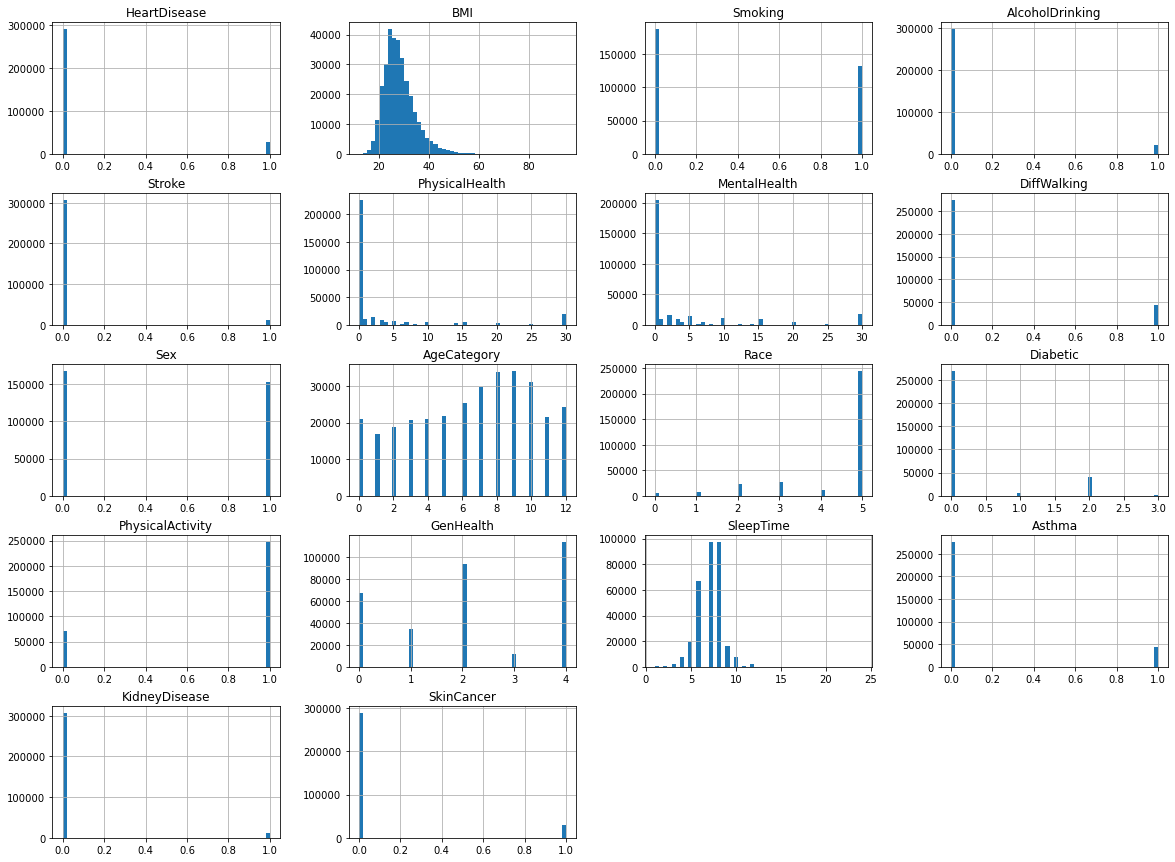

In [ ]:
# Histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

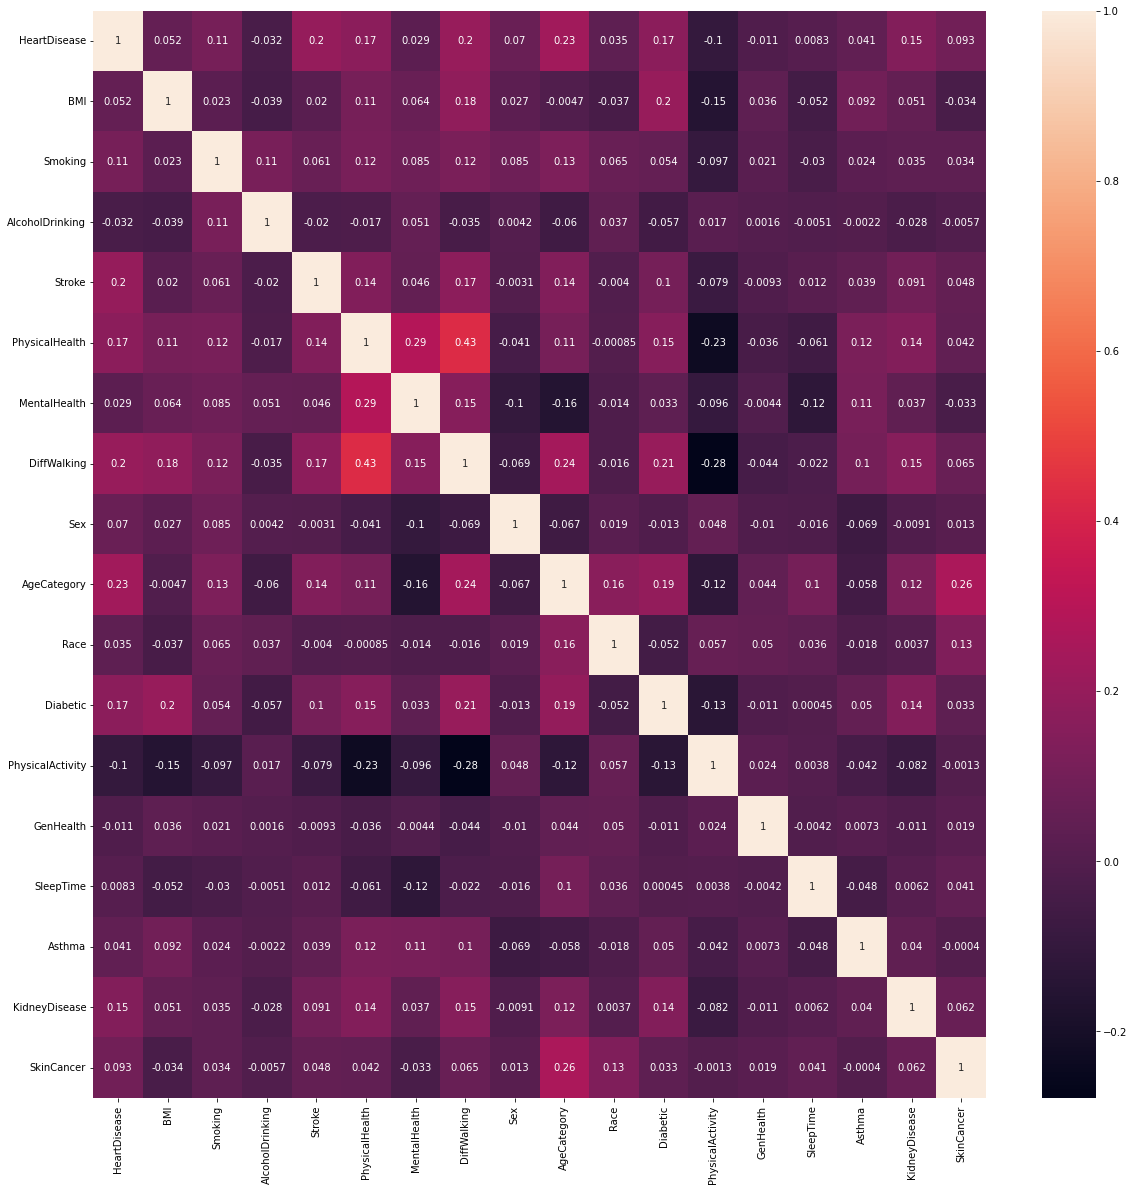

In [ ]:
# Heatmap
corr_matrix = data.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

### Removing unnecessary features

In [ ]:
data.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)

## Outliers

HeartDisease         AxesSubplot(0.125,0.772143;0.168478x0.107857)
BMI               AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Smoking           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Stroke            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
PhysicalHealth       AxesSubplot(0.125,0.642714;0.168478x0.107857)
MentalHealth      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
DiffWalking       AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Sex               AxesSubplot(0.731522,0.642714;0.168478x0.107857)
AgeCategory          AxesSubplot(0.125,0.513286;0.168478x0.107857)
Race              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Diabetic          AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Asthma            AxesSubplot(0.731522,0.513286;0.168478x0.107857)
KidneyDisease        AxesSubplot(0.125,0.383857;0.168478x0.107857)
SkinCancer        AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype: object

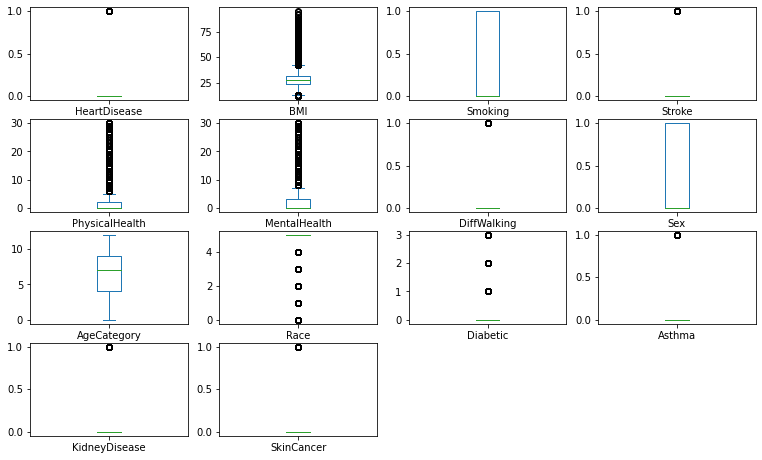

In [ ]:
data.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

### Removing BMI Outliers

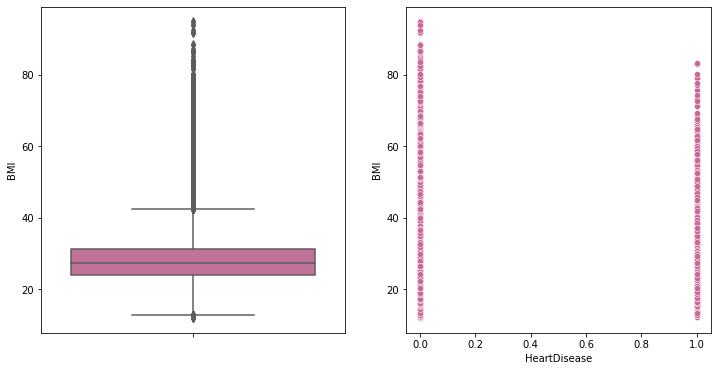

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='HeartDisease',y='BMI',color='#cc6699')
plt.show()

In [ ]:
x=data[data['BMI']>100]
x.shape

(0, 14)

In [ ]:
data=data[data['BMI']<=100]

## Data Splitting

In [ ]:
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 13) 
 y_shape: (319795,)


### Check imbalanced classes

In [ ]:
y.value_counts() 

0    292422
1     27373
Name: HeartDisease, dtype: int64

### Random Over-Sampling to deal with Imbalanced Data

In [ ]:
from imblearn.over_sampling  import RandomOverSampler

In [ ]:
smoteOver = RandomOverSampler(sampling_strategy=1)

In [ ]:
X_smoteOver, y_smoteOver = smoteOver.fit_resample(X,y)

In [ ]:
print(f' X_shape: {X_smoteOver.shape} \n y_shape: {y_smoteOver.shape}')

 X_shape: (584844, 13) 

 y_shape: (584844,)


## Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

In [ ]:
# Without sampling
X = scl.fit_transform(X)

In [ ]:
# with Random Oversampling
X_smoteOver = scl.fit_transform(X_smoteOver)

### Data Splitting

In [ ]:
# Without Sampling:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (255836, 13) & X_test: (63959, 13)

 y_train: (255836,) & y_test: (63959,)


In [ ]:
# With Oversampling
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_smoteOver,y_smoteOver,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (467875, 13) & X_test: (116969, 13)

 y_train: (467875,) & y_test: (116969,)


In [ ]:
# Evaluation imports:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

In [ ]:
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

## Modelling

### 1. RandomForest

In [ ]:
#Before Sampling:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

In [ ]:
# After Random Oversampling:

rf_clf_res = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters After oversampling:
rf_clf_res.fit(X_train_res, y_train_res)

#predict
y_pred_test_res = rf_clf_res.predict(X_test_res)
y_pred_train_res = rf_clf_res.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train, y_pred_train)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test,y_pred_test)*100))
print('********************************************************')
print('********************************************************')
print('Accuracy of Train after Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy of Test after Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))

Accuracy of Train before sampling: 98.07298425553871

Accuracy of  Test before sampling: 89.82316796697884

********************************************************

********************************************************

Accuracy of Train after Oversampling: 96.92802564787604

Accuracy of Test after Oversampling: 93.75048089664783


[[52215  6246]

 [ 1064 57444]]


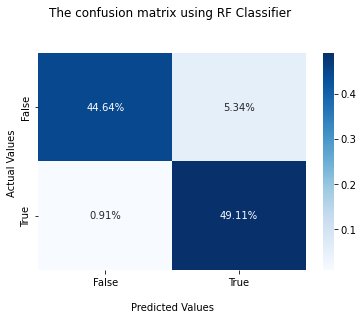

In [ ]:
cmatrix_fun('RF', y_test_res, y_pred_test_res)

In [ ]:
classification_report_fun('RF', y_test_res, y_pred_test_res)

The Classification Report for RF Classifier:

              precision    recall  f1-score   support



           0       0.98      0.89      0.93     58461

           1       0.90      0.98      0.94     58508



    accuracy                           0.94    116969

   macro avg       0.94      0.94      0.94    116969

weighted avg       0.94      0.94      0.94    116969




In [ ]:
rf_model = pd.DataFrame({"Y_test": y_test_res, "Y_pred" : y_pred_test_res})
rf_model.head(10)

,Y_test,Y_pred
114267,0,0
364804,1,1
230608,1,1
274445,0,0
76729,0,0
583565,1,1
568253,1,1
174950,0,0
495139,1,1
230341,0,0


### 2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Applying KNeighborsClassifier Model 
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 6)

In [ ]:
# With Oversampling
KNNClassifierModel.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_knn = KNNClassifierModel.predict(X_test_res)
y_pred_train_res_knn = KNNClassifierModel.predict(X_train_res)

In [ ]:
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_knn)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_knn)*100))

Accuracy of Train before sampling: 92.10939820822715

Accuracy of  Test before sampling: 91.28504198001845

********************************************************

Accuracy of Train after Random Oversampling: 90.47053165909699

Accuracy of Test after Random Oversampling: 87.68391625131446


[[46642 11819]

 [ 2587 55921]]


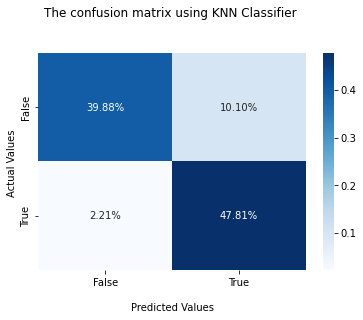

In [ ]:
cmatrix_fun('KNN', y_test_res, y_pred_test_res_knn)

In [ ]:
classification_report_fun("KNN", y_test_res, y_pred_test_res_knn)

The Classification Report for KNN Classifier:

              precision    recall  f1-score   support



           0       0.95      0.80      0.87     58461

           1       0.83      0.96      0.89     58508



    accuracy                           0.88    116969

   macro avg       0.89      0.88      0.88    116969

weighted avg       0.89      0.88      0.88    116969




### 3. Logistic Regression

In [ ]:
# import
from sklearn.linear_model import LogisticRegression

# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [ ]:
# Without Sampling
LogisticRegressionModel.fit(X_train, y_train)

#predict
y_pred_test_lr = LogisticRegressionModel.predict(X_test)
y_pred_train_lr = LogisticRegressionModel.predict(X_train)

In [ ]:
# With Random Oversampling
LogisticRegressionModel.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_lr = LogisticRegressionModel.predict(X_test_res)
y_pred_train_res_lr = LogisticRegressionModel.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_lr)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_lr)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_lr)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_lr)*100))

Accuracy of Train before sampling: 91.50588658359261

Accuracy of  Test before sampling: 91.50080520333339

********************************************************

Accuracy of Train after Random Oversampling: 75.14699438952712

Accuracy of Test after Random Oversampling: 75.16863442450564


[[43214 15247]

 [13798 44710]]


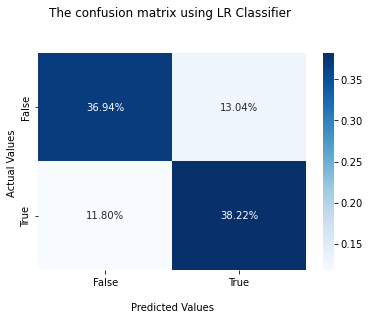

In [ ]:
cmatrix_fun('LR', y_test_res, y_pred_test_res_lr)

In [ ]:
classification_report_fun("LR", y_test_res, y_pred_test_res_lr)

The Classification Report for LR Classifier:

              precision    recall  f1-score   support



           0       0.76      0.74      0.75     58461

           1       0.75      0.76      0.75     58508



    accuracy                           0.75    116969

   macro avg       0.75      0.75      0.75    116969

weighted avg       0.75      0.75      0.75    116969




### 4. XGB

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier()

In [ ]:
# Without Sampling
xgb.fit(X_train, y_train)

#predict
y_pred_test_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)

In [ ]:
# With Random Oversampling
xgb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_xgb = xgb.predict(X_test_res)
y_pred_train_res_xgb = xgb.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_xgb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_xgb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_xgb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_xgb)*100))

Accuracy of Train before sampling: 91.97220094122798

Accuracy of  Test before sampling: 91.52113072437031

********************************************************

Accuracy of Train after Random Oversampling: 77.5681538872562

Accuracy of Test after Random Oversampling: 77.26320649060862


[[42603 15858]

 [10737 47771]]


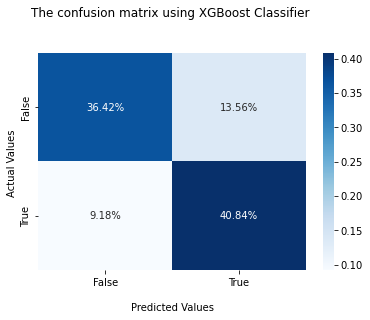

In [ ]:
cmatrix_fun("XGBoost", y_test_res, y_pred_test_res_xgb)

In [ ]:
classification_report_fun("XGBoost", y_test_res, y_pred_test_res_xgb)

The Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support



           0       0.80      0.73      0.76     58461

           1       0.75      0.82      0.78     58508



    accuracy                           0.77    116969

   macro avg       0.77      0.77      0.77    116969

weighted avg       0.77      0.77      0.77    116969




### 5. Decision Tree

In [ ]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 8,max_depth = 8)

In [ ]:
# Without Sampling
dt.fit(X_train, y_train)

#predict
y_pred_test_dt = dt.predict(X_test)
y_pred_train_dt = dt.predict(X_train)

In [ ]:
# With Random Oversampling
dt.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_dt = dt.predict(X_test_res)
y_pred_train_res_dt = dt.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_dt)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_dt)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_dt)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_dt)*100))

Accuracy of Train before sampling: 91.64191122437812

Accuracy of  Test before sampling: 91.57585328100815

********************************************************

Accuracy of Train after Random Oversampling: 75.02409831685813

Accuracy of Test after Random Oversampling: 75.01047286033051


[[41328 17133]

 [12097 46411]]


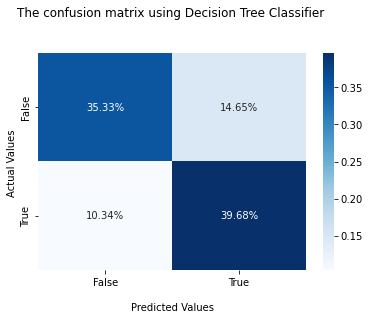

In [ ]:
cmatrix_fun("Decision Tree", y_test_res, y_pred_test_res_dt)

In [ ]:
classification_report_fun("Decision Tree", y_test_res, y_pred_test_res_dt)

The Classification Report for Decision Tree Classifier:

              precision    recall  f1-score   support



           0       0.77      0.71      0.74     58461

           1       0.73      0.79      0.76     58508



    accuracy                           0.75    116969

   macro avg       0.75      0.75      0.75    116969

weighted avg       0.75      0.75      0.75    116969




### 6. GBM (Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth = 8 , n_estimators= 6)

In [ ]:
# Without Sampling
gb.fit(X_train, y_train)

#predict
y_pred_test_gb = gb.predict(X_test)
y_pred_train_gb = gb.predict(X_train)

In [ ]:
# With Random Oversampling
gb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_gb = gb.predict(X_test_res)
y_pred_train_res_gb = gb.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_gb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_gb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_gb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_gb)*100))

Accuracy of Train before sampling: 91.45859065964133

Accuracy of  Test before sampling: 91.49611469847872

********************************************************

Accuracy of Train after Random Oversampling: 75.58706919583223

Accuracy of Test after Random Oversampling: 75.57130521762177


[[41264 17197]

 [11377 47131]]


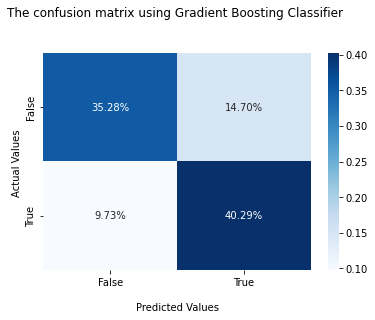

In [ ]:
cmatrix_fun("Gradient Boosting", y_test_res, y_pred_test_res_gb)

In [ ]:
classification_report_fun("Gradient Boostinge", y_test_res, y_pred_test_res_gb)

The Classification Report for Gradient Boostinge Classifier:

              precision    recall  f1-score   support



           0       0.78      0.71      0.74     58461

           1       0.73      0.81      0.77     58508



    accuracy                           0.76    116969

   macro avg       0.76      0.76      0.76    116969

weighted avg       0.76      0.76      0.76    116969




### 7. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [ ]:
# Without Sampling
ada.fit(X_train, y_train)

#predict
y_pred_test_ada = ada.predict(X_test)
y_pred_train_ada = ada.predict(X_train)

In [ ]:
# With Random Oversampling
ada.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_ada = ada.predict(X_test_res)
y_pred_train_res_ada = ada.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_ada)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_ada)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_ada)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_ada)*100))

Accuracy of Train before sampling: 91.47070779718257

Accuracy of  Test before sampling: 91.49298769524226

********************************************************

Accuracy of Train after Random Oversampling: 75.12391130109538

Accuracy of Test after Random Oversampling: 75.10195008933991


[[43457 15004]

 [14119 44389]]


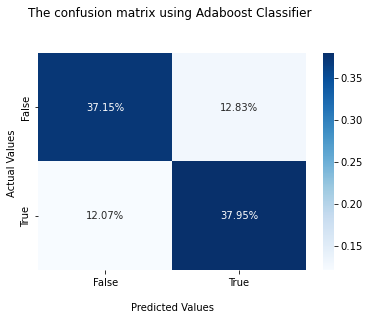

In [ ]:
cmatrix_fun("Adaboost", y_test_res, y_pred_test_res_ada)

In [ ]:
classification_report_fun("AdaBoost", y_test_res, y_pred_test_res_ada)

The Classification Report for Gradient Boostinge Classifier:

              precision    recall  f1-score   support



           0       0.75      0.74      0.75     58461

           1       0.75      0.76      0.75     58508



    accuracy                           0.75    116969

   macro avg       0.75      0.75      0.75    116969

weighted avg       0.75      0.75      0.75    116969




### 8. light GBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 8)

In [ ]:
# Without Sampling
lgbm.fit(X_train, y_train)

#predict
y_pred_test_lgbm = lgbm.predict(X_test)
y_pred_train_lgbm = lgbm.predict(X_train)

In [ ]:
# With Random Oversampling
lgbm.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_lgbm = lgbm.predict(X_test_res)
y_pred_train_res_lgbm = lgbm.predict(X_train_res)

In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_lgbm)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_lgbm)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_lgbm)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_lgbm)*100))

Accuracy of Train before sampling: 91.71891367907565

Accuracy of  Test before sampling: 91.58992479557216

********************************************************

Accuracy of Train after Random Oversampling: 76.09575207053166

Accuracy of Test after Random Oversampling: 76.00560832357291


[[41359 17102]

 [10964 47544]]


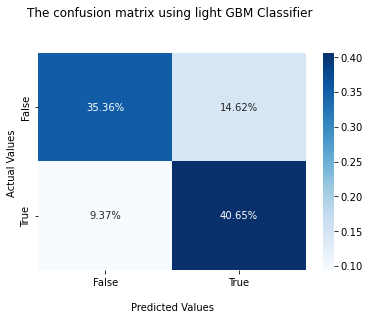

In [ ]:
cmatrix_fun("light GBM", y_test_res, y_pred_test_res_lgbm)

In [ ]:
classification_report_fun("Gradient Boostinge", y_test_res, y_pred_test_res_lgbm)

The Classification Report for Gradient Boostinge Classifier:

              precision    recall  f1-score   support



           0       0.79      0.71      0.75     58461

           1       0.74      0.81      0.77     58508



    accuracy                           0.76    116969

   macro avg       0.76      0.76      0.76    116969

weighted avg       0.76      0.76      0.76    116969




### 9. CatBoost

In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(max_depth = 10, iterations=10, learning_rate=0.4)

In [ ]:
# Without Sampling
cb.fit(X_train, y_train)

#predict
y_pred_test_cb = cb.predict(X_test)
y_pred_train_cb = cb.predict(X_train)

0:	learn: 0.4606621	total: 179ms	remaining: 1.61s

1:	learn: 0.3571707	total: 210ms	remaining: 839ms

2:	learn: 0.3015619	total: 241ms	remaining: 562ms

3:	learn: 0.2710347	total: 269ms	remaining: 404ms

4:	learn: 0.2538246	total: 296ms	remaining: 296ms

5:	learn: 0.2441288	total: 324ms	remaining: 216ms

6:	learn: 0.2377030	total: 355ms	remaining: 152ms

7:	learn: 0.2335423	total: 386ms	remaining: 96.6ms

8:	learn: 0.2312759	total: 422ms	remaining: 46.9ms

9:	learn: 0.2295657	total: 455ms	remaining: 0us


In [ ]:
# With Random Oversampling
cb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_cb = cb.predict(X_test_res)
y_pred_train_res_cb = cb.predict(X_train_res)

0:	learn: 0.5918850	total: 64.6ms	remaining: 581ms

1:	learn: 0.5461751	total: 136ms	remaining: 545ms

2:	learn: 0.5235527	total: 210ms	remaining: 490ms

3:	learn: 0.5115391	total: 275ms	remaining: 413ms

4:	learn: 0.5051339	total: 340ms	remaining: 340ms

5:	learn: 0.5007243	total: 397ms	remaining: 265ms

6:	learn: 0.4977540	total: 457ms	remaining: 196ms

7:	learn: 0.4960409	total: 510ms	remaining: 128ms

8:	learn: 0.4946178	total: 579ms	remaining: 64.3ms

9:	learn: 0.4930153	total: 628ms	remaining: 0us


In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_cb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_cb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_cb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_cb)*100))

Accuracy of Train before sampling: 91.70249691208431

Accuracy of  Test before sampling: 91.61337731984553

********************************************************

Accuracy of Train after Random Oversampling: 76.05599786267699

Accuracy of Test after Random Oversampling: 75.99021963084236


[[42181 16280]

 [11804 46704]]


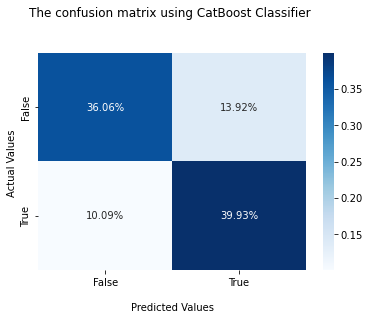

In [ ]:
cmatrix_fun("CatBoost", y_test_res, y_pred_test_res_cb)

In [ ]:
classification_report_fun("CatBoost", y_test_res, y_pred_test_res_cb)

The Classification Report for CatBoost Classifier:

              precision    recall  f1-score   support



           0       0.78      0.72      0.75     58461

           1       0.74      0.80      0.77     58508



    accuracy                           0.76    116969

   macro avg       0.76      0.76      0.76    116969

weighted avg       0.76      0.76      0.76    116969




### 10. Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

v_clf = VotingClassifier(estimators=
                         [("LogisticRegression" , LogisticRegressionModel) ,
                          ("XGBClassifier" , xgb) ,
                          ("CatBoost", cb),
                          ("RandomForestClassifier" , rf_clf)] , voting = "hard")

In [ ]:
# Without Sampling
v_clf.fit(X_train, y_train)

#predict
y_pred_test_v_clf = v_clf.predict(X_test)
y_pred_train_v_clf = v_clf.predict(X_train)

0:	learn: 0.4606621	total: 29.8ms	remaining: 268ms

1:	learn: 0.3571707	total: 61ms	remaining: 244ms

2:	learn: 0.3015619	total: 94ms	remaining: 219ms

3:	learn: 0.2710347	total: 125ms	remaining: 187ms

4:	learn: 0.2538246	total: 153ms	remaining: 153ms

5:	learn: 0.2441288	total: 179ms	remaining: 119ms

6:	learn: 0.2377030	total: 207ms	remaining: 88.5ms

7:	learn: 0.2335423	total: 234ms	remaining: 58.6ms

8:	learn: 0.2312759	total: 262ms	remaining: 29.1ms

9:	learn: 0.2295657	total: 291ms	remaining: 0us


In [ ]:
# With Random Oversampling
v_clf.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_v_clf = v_clf.predict(X_test_res)
y_pred_train_res_v_clf = v_clf.predict(X_train_res)

0:	learn: 0.5918850	total: 42.3ms	remaining: 380ms

1:	learn: 0.5461751	total: 86.4ms	remaining: 346ms

2:	learn: 0.5235527	total: 133ms	remaining: 309ms

3:	learn: 0.5115391	total: 175ms	remaining: 263ms

4:	learn: 0.5051339	total: 220ms	remaining: 220ms

5:	learn: 0.5007243	total: 267ms	remaining: 178ms

6:	learn: 0.4977540	total: 316ms	remaining: 136ms

7:	learn: 0.4960409	total: 370ms	remaining: 92.6ms

8:	learn: 0.4946178	total: 415ms	remaining: 46.1ms

9:	learn: 0.4930153	total: 456ms	remaining: 0us


In [ ]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_v_clf)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_v_clf)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_v_clf)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_v_clf)*100))

Accuracy of Train before sampling: 91.9417126596726

Accuracy of  Test before sampling: 91.5852342907175

********************************************************

Accuracy of Train after Random Oversampling: 78.23670852257547

Accuracy of Test after Random Oversampling: 77.9873299763185


[[44669 13792]

 [11956 46552]]


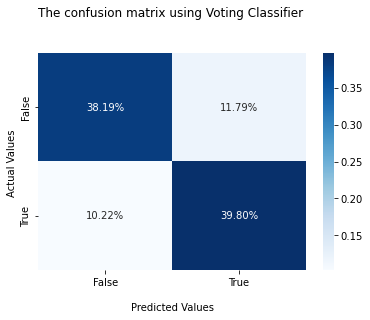

In [ ]:
cmatrix_fun("Voting", y_test_res, y_pred_test_res_v_clf)

In [ ]:
classification_report_fun("Voting", y_test_res, y_pred_test_res_v_clf)

The Classification Report for Voting Classifier:

              precision    recall  f1-score   support



           0       0.79      0.76      0.78     58461

           1       0.77      0.80      0.78     58508



    accuracy                           0.78    116969

   macro avg       0.78      0.78      0.78    116969

weighted avg       0.78      0.78      0.78    116969


